workshop 1: grupo 4

-----------


In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("properatti.csv")
data = df_raw.copy()
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [3]:
def nulos(data=data):
    result = data.isnull().sum().sort_values(ascending=False)
    return result


def nuloss(data=data):
    print(">> DATOS NULOS:\n")
    display(data.isnull().sum().sort_values(ascending=False))
    return


def porcentaje_nulos(data=data):
    result = data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100
    return result


def porcentaje_nuloss(data=data):
    print(">> PORCENTAJE DE DATOS NULOS:\n")
    display(
        round(data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100, 2)
    )
    return

In [4]:
print("data")
porcentaje_nuloss()

data
>> PORCENTAJE DE DATOS NULOS:



floor                         93.48
expenses                      88.23
rooms                         60.91
price_usd_per_m2              43.39
lon                           42.53
lat-lon                       42.53
lat                           42.53
surface_total_in_m2           32.44
price_per_m2                  27.69
currency                      16.84
price_aprox_usd               16.84
price_aprox_local_currency    16.84
price                         16.84
surface_covered_in_m2         16.42
geonames_id                   15.44
image_thumbnail                2.57
place_name                     0.02
description                    0.00
title                          0.00
properati_url                  0.00
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
property_type                  0.00
operation                      0.00
Unnamed: 0                     0.00
dtype: float64

# 1. LIMPIEZA PRELIMINAR DEL DATASET

In [5]:
print(
    "Tipos de operacion:\n{}".format(data.operation.value_counts()),
    "\n\nPais de ubicacion del inmueble:\n{}".format(data.country_name.value_counts()),
)

Tipos de operacion:
sell    121220
Name: operation, dtype: int64 

Pais de ubicacion del inmueble:
Argentina    121220
Name: country_name, dtype: int64


In [6]:
# LIMPIEZA POR COLUMNAS INNECESARIAS

# Columnas: Unnamed y geonames_id: no aportan al analisis
data.drop([data.columns[0], "geonames_id"], axis=1, inplace=True)

# Columnas: operation y country_name: son redundantes porque poseen un valor unico
data.drop(["operation", "country_name"], axis=1, inplace=True)

data.tail(2)

,property_type,place_name,place_with_parent_names,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
121218,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,NaN,NaN,NaN,95900.0,USD,1692107.55,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...
121219,apartment,Capital Federal,|Argentina|Capital Federal|,Capital Federal,NaN,NaN,NaN,129000.0,USD,2276140.50,...,77.0,1675.324675,1675.324675,NaN,NaN,3500.0,http://www.properati.com.ar/1cjaa_venta_depart...,Departamento de 77 m2 apto profesional. Edific...,Departamento apto profesional en el Centro,https://thumbs4.properati.com/8/mNEsnQWqB7joBF...


In [7]:
# LIMPIEZA SEGUN CANTIDAD DE COLUMNAS NULAS POR ENTRADA
rows_null_values = data.isna().sum(axis=1)
print(
    "Cantidad de columnas nulas por entradas:\n{}".format(
        rows_null_values.value_counts(sort=False)
    )
)

mask_rows_null_values = rows_null_values < 9
print(
    "\nCantidad de entradas que tienen 9 o más de 9 variables nulas: {}".format(
        data.shape[0] - mask_rows_null_values.sum()
    )
)
print(
    "Porcentaje de entradas con exceso de variables nulas {}%".format(
        round((data.shape[0] - mask_rows_null_values.sum()) / data.shape[0] * 100, 2)
    )
)
print("Dimension del nuevo dataframe: {}".format(data[mask_rows_null_values].shape[0]))

Cantidad de columnas nulas por entradas:
0       665
1      2056
2     22109
3     15483
4     10233
5     12042
6     19355
7      6381
8     12556
9      3910
10     5511
11     2655
12     4514
13     2524
14     1048
15      178
dtype: int64

Cantidad de entradas que tienen 9 o más de 9 variables nulas: 20340
Porcentaje de entradas con exceso de variables nulas 16.78%
Dimension del nuevo dataframe: 100880


In [8]:
data = data[mask_rows_null_values]
print("PORCENTAJE DE DATOS NULOS:\n", round(data.isna().sum() / data.shape[0] * 100, 2))

PORCENTAJE DE DATOS NULOS:
 property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
state_name                     0.00
lat-lon                       37.85
lat                           37.85
lon                           37.85
price                          4.11
currency                       4.11
price_aprox_local_currency     4.11
price_aprox_usd                4.11
surface_total_in_m2           28.03
surface_covered_in_m2          9.54
price_usd_per_m2              32.20
price_per_m2                  13.59
floor                         92.71
rooms                         57.03
expenses                      86.86
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                1.16
dtype: float64


-----------------
**Analisis de place_name**

-------------

In [9]:
## PRIMER ANALISIS VER DE RESCATAR LOS 23 NANS DE PLACE_NAME
print(
    "Conteo de valores: data.place_with_parent_name / mascara: data.place_name.isna()"
)
print(data[data.place_name.isna()].place_with_parent_names.value_counts().to_string())
print(
    'Observacion:\n* Podemos observar que las 23 entradas faltantes corresponden a la localidad de "Tigre"'
)

Conteo de valores: data.place_with_parent_name / mascara: data.place_name.isna()
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    23
Observacion:
* Podemos observar que las 23 entradas faltantes corresponden a la localidad de "Tigre"


In [10]:
data.loc[data.place_name.isna(), "place_name"] = "Tigre"

C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [11]:
print("CONTEO DE VALORES NULOS EN LAS PRIMERAS COLUMNAS:")
print(data.iloc[:, :4].isna().sum().to_string())
print("Observacion:\n* 23 valores recuperados en la columna place_name:")

CONTEO DE VALORES NULOS EN LAS PRIMERAS COLUMNAS:
property_type              0
place_name                 0
place_with_parent_names    0
state_name                 0
Observacion:
* 23 valores recuperados en la columna place_name:


### CONCLUSION 1:

A partir del analisis de columnas, logramos reducir nuestro dataset. El criterio utilizado fue el de eliminar aquellas entradas que representen valores faltantes en exceso. 

El resumen obtenido en la reduccion de datos nulos es:

    - lat-lon, lat, lon = 4,68%    
    - price, currency, price_aprox's = 12,73%   
    - surface_total_in_m2 = 4,41%   
    - surface_covered_in_m2 = 6,88%   
    - price_usd_per_m2 = 11,19%   
    - price_per_m2 = 14,1%   
    - floor = 0,77%   
    - rooms = 3,88%   
    - expenses = 1,37%   



In [12]:
print(f"Nuevo tamaño del dataframe data: {data.shape[0]}")

Nuevo tamaño del dataframe data: 100880


Cantidad de propiedades publicadas según su provincia/localidad


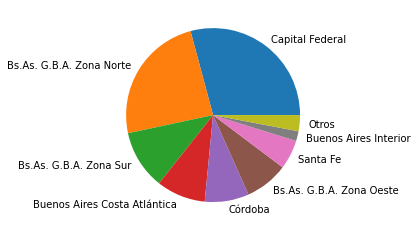

In [13]:
serie_aux = data.state_name.value_counts()
valores = serie_aux[:8].values.tolist()
valores.append(serie_aux[8:].sum())
valores

labels = serie_aux[:8].index.tolist()
labels.append("Otros")
labels

print("Cantidad de propiedades publicadas según su provincia/localidad")
plt.pie(valores, labels=labels)
plt.show()

# 2. ANALISIS POR COTIZACION: DIVISAS E INMUEBLES

**CELDA DE ACLARACIONES PERTINENTES:**

- VARIABLES TIPO DATAFRAME CREADAS:
    - data_price
    - mayor_sup | frame.shape(100880,2) : es un auxiliar para crear la columna "surface_total_in_m2_mod" en data_price
    - data_check: dataframe auxiliar
    
    
- VARIABLES TIPO MASCARAS CREADAS:
    - mascara_superficie_notnull
    - mascara_covered_notna_total_isna
    - mascara_mayor_sup | mask.shape(67246,)  * potencial de tirar 1031 entradas ilogicas: haciendo drop de: mascara_mayor_sup[mascara_mayor_sup==False]
    - mascara_logica_usd_ars
    - mask_data: mascara auxiliar
    

- VARIABLE PYTHON:
    - tc: tipo float, representa el tipo de cambio del par (ARS/USD)
    - lista: tipo lista, con los indices de un .value_counts: representa el ranking de valores más repetidos en data_check['pct_change']
    
    
- SERIES:
    - serie_check = serie auxiliar
    
    
- INDICES:
    - filas_incoherentes
    - indice_price: un objeto tipo indice con las entradas del data_price ANTES DEL RECUPERO DE NANS
   

In [14]:
columnas = [
    "price",
    "currency",
    "price_aprox_local_currency",
    "price_aprox_usd",
    "price_usd_per_m2",
    "price_per_m2",
    "surface_covered_in_m2",
    "surface_total_in_m2",
]
data_price = data[columnas].copy()

In [15]:
print("data_price")
nuloss(data_price)
porcentaje_nuloss(data_price)

data_price
>> DATOS NULOS:



price_usd_per_m2              32479
surface_total_in_m2           28278
price_per_m2                  13705
surface_covered_in_m2          9628
currency                       4149
price_aprox_usd                4148
price_aprox_local_currency     4148
price                          4148
dtype: int64

>> PORCENTAJE DE DATOS NULOS:



price_usd_per_m2              32.20
surface_total_in_m2           28.03
price_per_m2                  13.59
surface_covered_in_m2          9.54
currency                       4.11
price_aprox_usd                4.11
price_aprox_local_currency     4.11
price                          4.11
dtype: float64

In [16]:
print("1) Analisis logico de superficie total vs superficie cubierta\n")
mascara_superficie_notnull = (
    data_price.surface_total_in_m2.notna() & data_price.surface_covered_in_m2.notna()
)

print("* UNION DE ENTRADAS NULAS EN SUPERFICIE")
display(
    data_price[mascara_superficie_notnull][
        ["surface_total_in_m2", "surface_covered_in_m2"]
    ].describe()[:3]
)
print("\nUsamos la mascara: mascara_superficie_notnull")

## DATAFRAME "RESAGO" PARA INCORPORAR LOS 24000 VALORES DE SUPERFICIE CUBIERTA NO NULOS QUE DESCARTAMOS EN LA MASCARA
print("\n* UNION ENTRE NO NULAS CUBIERTAS Y NULAS TOTALES")
mascara_covered_notna_total_isna = (
    data_price.surface_covered_in_m2.notna() & data_price.surface_total_in_m2.isna()
)
display(
    data[mascara_covered_notna_total_isna][
        ["surface_covered_in_m2", "surface_total_in_m2"]
    ].describe()[:3]
)
print("\nUsamos la mascara: mascara_covered_notna_total_isna")
# print ('La cantidad de datos "resago" son: {}\nLa mascara utilizada: mascara_covered_notna_total_isna'.format(mascara_covered_notna_total_isna.sum()))

print("\n* VERIFICACION DE LOGICA: TOTAL MAYOR A CUBIERTO")
mascara_mayor_sup = (
    data_price[mascara_superficie_notnull].surface_total_in_m2
    >= data_price[mascara_superficie_notnull].surface_covered_in_m2
)  # comprobamos que haya logica Total > Cubierto
print(
    "{}: sup_cubierta > sup_total\n{}: error\n".format(
        mascara_mayor_sup.value_counts().to_string().split("\n")[0],
        mascara_mayor_sup.value_counts().to_string().split("\n")[1],
    )
)
print("Usamos la mascara: mascara_mayor_sup")


mayor_sup = data_price[["surface_total_in_m2", "surface_covered_in_m2"]].fillna(
    0
)  # remplazamos los Nan con 0 para que cuando tenga el dato en una columna y en la otra no el np.maximum funcione

data_price["surface_total_in_m2_mod"] = np.maximum(
    mayor_sup.surface_total_in_m2, mayor_sup.surface_covered_in_m2
)  # tomamos el mayor
data_price["surface_total_in_m2_mod"] = data_price["surface_total_in_m2_mod"].replace(
    0, np.nan
)  # volvemos a colocar los Nan reemplazados por 0
print(
    "\n* PORCENTAJE DE DATOS NULOS:\n",
    round(data_price.isna().sum() / data_price.shape[0] * 100, 2).to_string(),
)  # ahora solo quedan vacios el 4,47% de los datos de superficie

1) Analisis logico de superficie total vs superficie cubierta

* UNION DE ENTRADAS NULAS EN SUPERFICIE


,surface_total_in_m2,surface_covered_in_m2
count,67246.000000,67246.000000
mean,229.317863,125.973143
std,1608.051231,404.796436



Usamos la mascara: mascara_superficie_notnull

* UNION ENTRE NO NULAS CUBIERTAS Y NULAS TOTALES


,surface_covered_in_m2,surface_total_in_m2
count,24006.000000,0.0
mean,140.852995,NaN
std,1256.729021,NaN



Usamos la mascara: mascara_covered_notna_total_isna

* VERIFICACION DE LOGICA: TOTAL MAYOR A CUBIERTO
True     66215: sup_cubierta > sup_total
False     1031: error

Usamos la mascara: mascara_mayor_sup

* PORCENTAJE DE DATOS NULOS:
 price                          4.11
currency                       4.11
price_aprox_local_currency     4.11
price_aprox_usd                4.11
price_usd_per_m2              32.20
price_per_m2                  13.59
surface_covered_in_m2          9.54
surface_total_in_m2           28.03
surface_total_in_m2_mod        4.47


In [17]:
def prueba_isna(
    frame, label_list, label
):  # entragas un dataframe, la lista de columnas que queres chequear, y la label de la columna que se toma de referencia
    print(f"Comparacion de cantidad de NaN types en funcion de la columna {label}")
    mascara_comparativa = frame[label].isna()
    print(frame.loc[mascara_comparativa, label_list].isna().sum().to_string())

In [18]:
prueba = [
    "price",
    "price_aprox_local_currency",
    "price_aprox_usd",
    "price_usd_per_m2",
    "price_per_m2",
]
prueba_isna(data_price, prueba, "price")

Comparacion de cantidad de NaN types en funcion de la columna price
price                         4148
price_aprox_local_currency    4148
price_aprox_usd               4148
price_usd_per_m2              4148
price_per_m2                  4148


In [19]:
print("dimension total:", data_price.shape[0])

print("\nComparacion de los precios por metro cuadrado en funcion de la divisa")
mascara_logica_usd_ars = mascara_logica_usd_ars = ~(
    (data_price["currency"] == "ARS")
    & (data_price["price_usd_per_m2"] > data_price["price_per_m2"])
)
print(
    "{}: precio_m2_usd > precio_m2_ars\n{}: error\n".format(
        mascara_logica_usd_ars.value_counts().to_string().split("\n")[0],
        mascara_logica_usd_ars.value_counts().to_string().split("\n")[1],
    )
)

print("\n* Extraccion de 5 valores ilogicos")
data_price = data_price[mascara_logica_usd_ars]  # saco los valores ilogicos

print("dimension total:", data_price.shape[0])

dimension total: 100880

Comparacion de los precios por metro cuadrado en funcion de la divisa
True     100875: precio_m2_usd > precio_m2_ars
False         5: error


* Extraccion de 5 valores ilogicos
dimension total: 100875


In [20]:
print("Conteo de divisas:")
print(data_price.currency.value_counts().to_string())
# contamos la canitdad que hay en usd y en ars

Conteo de divisas:
USD    84764
ARS    11962


In [21]:
## CALCULAMOS LA COTIZACION DEL PESO RESPECTO DEL DOLAR
tc = (
    data_price.price_aprox_local_currency / data_price.price_aprox_usd
)  # sacamos el TC por fila
print(
    tc.describe().round(4).to_string()
)  # vemos que no haya ningun desvio u outlayer afectando la cuenta
tc = tc.mean().round(3)  # tc promedio 17.6444
print(f"\nEl valor de cotizacion de divisa es {tc}")

count    96726.0000
mean        17.6445
std          0.0000
min         17.6445
25%         17.6445
50%         17.6445
75%         17.6445
max         17.6445

El valor de cotizacion de divisa es 17.644


In [22]:
## DIVIDIMOS EL VALOR DEL INMUEBLE COTIZADO EN PESOS POR LA VALOR DE TC PARA OBTENER EL PRECIO EN USD
mask_data = data_price.currency == "ARS"
data_check = data_price.copy()
data_check = data_check.loc[mask_data]
print("filtramos por las filas en pesos")
data_check.loc[:, "control_cruzado_precio_usd"] = data_check.price / tc

print("creamos una columna de control de precio en usd")
print("calculamos la diferencia entre la de control y la de price_aprox_usd")
data_check.loc[:, "pct_change"] = (
    data_check["control_cruzado_precio_usd"] / data_check["price_aprox_usd"] - 1
) * 100


print(data_check["pct_change"].describe().round(2).to_string())
print(
    "Observacion:\n* ['data_aprox_usd'] es confiable para tomar como precio en usd con un rango de desvio relativamente bajo de 1.05% a -2.84%"
)

# serie_check = data_check['pct_change'].sample(1000)
# sns.scatterplot(y=serie_check, x=serie_check.index)

filtramos por las filas en pesos
creamos una columna de control de precio en usd
calculamos la diferencia entre la de control y la de price_aprox_usd
count    11962.00
mean         0.96
std          0.61
min         -2.84
25%          1.06
50%          1.06
75%          1.06
max          1.06
Observacion:
* ['data_aprox_usd'] es confiable para tomar como precio en usd con un rango de desvio relativamente bajo de 1.05% a -2.84%


In [23]:
### DIVIDIMOS CALCULAMOS EL RATIO PRECIO_APROX_IN_USD CON SURFACE_TOTAL_IN_M2_MOD

print("vamos a chequear si tiene logica el precio por m2 con un control cruzado")
print(
    "creo la columna de control en base al precio en usd dividido la columna corregida y completada de superficie"
)
print("calculamos la diferencia")

data_check = data_price.loc[
    :, ["currency", "price_aprox_usd", "surface_total_in_m2_mod"]
]
data_check["control_cruzado_precio_m2_usd"] = (
    data_price["price_aprox_usd"] / data_price["surface_total_in_m2_mod"]
)


data_check.loc[:, "pct_change"] = (
    data_check.loc[:, "control_cruzado_precio_m2_usd"]
    / data_price.loc[:, "price_usd_per_m2"]
    - 1
) * 100  # calculamos la diferencia

# print ('Descripcion de data_check.pct_change:')
# print(data_check['pct_change'].round(2).describe().to_string()) #vemos que a grandes rasgos parece confiable salvo algunas filas que deben tener errores y son 68401 filas hay que ver como recuperar las faltantes
# print ('Observacion:\n* El minimo de -99')
print(
    "\nNANS DEL FRAME:\n", data_check.isna().sum()
)  # control_price_usd_per_m2[['price_aprox_usd', 'surface_total_in_m2_mod', 'control_cruzado_precio_m2_usd','pct_change']].isna().sum())
print(
    "\nSHAPE DEL FRAME:", data_check.shape, "\n"
)  # control_price_usd_per_m2[['price_aprox_usd', 'surface_total_in_m2_mod', 'control_cruzado_precio_m2_usd','pct_change']].shape)
print("\nCOLUMNAS DEL FRAME: {}".format(data_check.columns))
print(
    data_check["pct_change"].describe(),
    "\nObservacion:\n* Vemos que a grandes rasgos parece confiable salvo algunas filas que deben tener errores\n* Son 68401 filas hay que ver como recuperar las faltantes",
)

vamos a chequear si tiene logica el precio por m2 con un control cruzado
creo la columna de control en base al precio en usd dividido la columna corregida y completada de superficie
calculamos la diferencia

NANS DEL FRAME:
 currency                          4149
price_aprox_usd                   4148
surface_total_in_m2_mod           4507
control_cruzado_precio_m2_usd     8654
pct_change                       32479
dtype: int64

SHAPE DEL FRAME: (100875, 5) 


COLUMNAS DEL FRAME: Index(['currency', 'price_aprox_usd', 'surface_total_in_m2_mod',
       'control_cruzado_precio_m2_usd', 'pct_change'],
      dtype='object')
count    6.839600e+04
mean    -4.327781e-01
std      4.701079e+00
min     -9.989388e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.440892e-14
Name: pct_change, dtype: float64 
Observacion:
* Vemos que a grandes rasgos parece confiable salvo algunas filas que deben tener errores
* Son 68401 filas hay que ver como recuperar las faltantes


In [24]:
serie_check = data_check["pct_change"].round(3).value_counts()


print("\nAnalisis de data.pct_change: ranking de valores")
print("Valores más repetidos: \n", serie_check)
print("\nConteo de la cantidad de repeticiones:\n", serie_check.value_counts())
print(
    f"Observaciones:\n* 1 solo valor se repite 67424 veces, el elemento 0.00\n* 4 elementos independientes suman {19+13+12+11} repeticiones\
\n* 4 elementos independientes se repiten 9 veces\n* 3 elementos independientes se repiten 14 veces\n* 3 elementos independientes se repiten 10 veces\n"
)

print("PRUEBA:")
n = 67424
serie_check[serie_check == n]
list(serie_check[serie_check == n].index)
print(
    f"El elemento que se repite {n} veces es el {list(serie_check[serie_check == n].index)}"
)

lista = [19, 13, 12, 11]
for n in lista:
    print(
        f"El elemento que se repite {n} veces es el {list(serie_check[serie_check == n].index)}"
    )

lista = [9]
print(
    f"Los elementos que se repiten {lista[0]} veces son {list(serie_check[serie_check == lista[0]].index)}"
)
lista = [14]
print(
    f"Los elementos que se repiten {lista[0]} veces son {list(serie_check[serie_check == lista[0]].index)}"
)
lista = [10]
print(
    f"Los elementos que se repiten {lista[0]} veces son {list(serie_check[serie_check == lista[0]].index)}"
)


Analisis de data.pct_change: ranking de valores
Valores más repetidos: 
  0.000     67424
-32.143       19
-50.000       14
-16.667       14
-40.000       14
           ...  
-10.299        1
-84.164        1
-30.342        1
-91.786        1
-6.780         1
Name: pct_change, Length: 578, dtype: int64

Conteo de la cantidad de repeticiones:
 1        422
2         87
3         29
4         14
6          5
9          4
14         3
10         3
8          2
7          2
5          2
67424      1
19         1
13         1
12         1
11         1
Name: pct_change, dtype: int64
Observaciones:
* 1 solo valor se repite 67424 veces, el elemento 0.00
* 4 elementos independientes suman 55 repeticiones
* 4 elementos independientes se repiten 9 veces
* 3 elementos independientes se repiten 14 veces
* 3 elementos independientes se repiten 10 veces

PRUEBA:
El elemento que se repite 67424 veces es el [0.0]
El elemento que se repite 19 veces es el [-32.143]
El elemento que se repite 13 veces es 

**POR ESTA RAZON TOMAMOS RANGO OUTLIER A LOS VALORES DE DATA_PRICE['PCT_CHANGE'] QUE NO PERTENEZCAN AL INTERVALO (-4,75 ; 4,75)**

In [25]:
print(" Elimino del dataset de trabajo los que tenian desvios de +- 4.75%")
filas_incoherentes = data_check.loc[
    (data_check["pct_change"] < -4.75) | (data_check["pct_change"] > 4.75)
].index  # saco las que tienen desvio de +-5%
print("filas_incoherentes es un indice")
print(filas_incoherentes)
print("\n* Longitud del indice:", len(filas_incoherentes))


# sns.scatterplot(y=control_price_usd_per_m2['pct_change'],x=control_price_usd_per_m2.index)

 Elimino del dataset de trabajo los que tenian desvios de +- 4.75%
filas_incoherentes es un indice
Int64Index([   177,    316,    317,    455,    668,    918,   1397,   1598,
              4282,   4363,
            ...
            119784, 119787, 119830, 119846, 120124, 120168, 120181, 120202,
            120302, 121055],
           dtype='int64', length=870)

* Longitud del indice: 870


In [26]:
print("IMPUTACION data_price")
print("Shape anterior data_price", data_price.shape)
data_price = data_price.drop(filas_incoherentes)
display(data_price)
print("Shape actual data_price:", data_price.shape)
print("indice_price creada:")
indice_price = data_price.index

IMPUTACION data_price
Shape anterior data_price (100875, 9)


,price,currency,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2,surface_covered_in_m2,surface_total_in_m2,surface_total_in_m2_mod
0,62000.0,USD,1093959.00,62000.0,1127.272727,1550.000000,40.0,55.0,55.0
1,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,NaN
2,72000.0,USD,1270404.00,72000.0,1309.090909,1309.090909,55.0,55.0,55.0
3,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,NaN
4,64000.0,USD,1129248.00,64000.0,1828.571429,1828.571429,35.0,35.0,35.0
...,...,...,...,...,...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0,7699.115044,9354.838710,93.0,113.0,113.0
121216,498000.0,USD,8786961.00,498000.0,1383.333333,1383.333333,360.0,360.0,360.0
121217,131500.0,USD,2320251.75,131500.0,2858.695652,3371.794872,39.0,46.0,46.0
121218,95900.0,USD,1692107.55,95900.0,1997.916667,1997.916667,48.0,48.0,48.0


Shape actual data_price: (100005, 9)
indice_price creada:


In [27]:
print("CONTEO DE VALORES NULOS data_price")
print(data_price.isna().sum().to_string())

CONTEO DE VALORES NULOS data_price
price                          4148
currency                       4149
price_aprox_local_currency     4148
price_aprox_usd                4148
price_usd_per_m2              32479
price_per_m2                  13705
surface_covered_in_m2          9628
surface_total_in_m2           28278
surface_total_in_m2_mod        4507


In [28]:
print("PORCENTAJE DE VALORES NULOS data_price")
print(round(data_price.isna().sum() / data_price.shape[0] * 100, 2).to_string())

PORCENTAJE DE VALORES NULOS data_price
price                          4.15
currency                       4.15
price_aprox_local_currency     4.15
price_aprox_usd                4.15
price_usd_per_m2              32.48
price_per_m2                  13.70
surface_covered_in_m2          9.63
surface_total_in_m2           28.28
surface_total_in_m2_mod        4.51


In [29]:
print(
    "ANALISIS DE RECUPERO price_usd_per_m2 POR price_aprox_usd/surface_total_in_m2_mod"
)
mask_data = (
    data_price.price_usd_per_m2.isna()
    & data_price.price_aprox_usd.notna()
    & data_price.surface_total_in_m2_mod.notna()
)
display(
    data_price.loc[
        mask_data, ["price_usd_per_m2", "price_aprox_usd", "surface_total_in_m2_mod"]
    ]
)
print("Observacion:\n* Potencial de recuperar 23825 datos")

print("\nCreamos columna auxiliar para obtener los valores")
data_price["recupero"] = (
    data_price.loc[mask_data, "price_aprox_usd"]
    / data_price.loc[mask_data, "surface_total_in_m2_mod"]
)

print("\nAnalisis de la columna recupero")
mask_data = data_price.recupero.notna()
display(data_price.loc[mask_data, "recupero"])

print("\nValidacion de los datos recuperados")
mask_data = data_price.price_usd_per_m2.isna()
display(data_price.loc[mask_data, ["price_usd_per_m2", "recupero"]].describe().round(2))
print(
    "Observacion:\n* Los 23825 valores efectivamente reemplazan Nans en price_usd_per_m2"
)

print("\nREEMPLAZO DE LOS VALORES")
data_price["price_usd_per_m2"].fillna(data_price["recupero"], inplace=True)
data_price.drop("recupero", axis=1, inplace=True)
print("Done")

ANALISIS DE RECUPERO price_usd_per_m2 POR price_aprox_usd/surface_total_in_m2_mod


,price_usd_per_m2,price_aprox_usd,surface_total_in_m2_mod
68,NaN,235000.0,72.0
77,NaN,150000.0,85.0
79,NaN,118000.0,42.0
87,NaN,875000.0,170.0
89,NaN,50000.0,53.0
...,...,...,...
121150,NaN,95000.0,52.0
121151,NaN,120000.0,72.0
121152,NaN,74500.0,33.0
121155,NaN,170000.0,130.0


Observacion:
* Potencial de recuperar 23825 datos

Creamos columna auxiliar para obtener los valores

Analisis de la columna recupero


68        3263.888889
77        1764.705882
79        2809.523810
87        5147.058824
89         943.396226
             ...     
121150    1826.923077
121151    1666.666667
121152    2257.575758
121155    1307.692308
121156    1307.692308
Name: recupero, Length: 23825, dtype: float64


Validacion de los datos recuperados


,price_usd_per_m2,recupero
count,0.0,23825.00
mean,NaN,4400.26
std,NaN,33752.71
min,NaN,3.20
25%,NaN,1276.42
50%,NaN,1790.12
75%,NaN,2452.83
max,NaN,2600000.00


Observacion:
* Los 23825 valores efectivamente reemplazan Nans en price_usd_per_m2

REEMPLAZO DE LOS VALORES
Done


In [30]:
print("data_price: ORIGINAL")
print(
    """
>> PORCENTAJE DE DATOS NULOS:

price_usd_per_m2              32.20
surface_total_in_m2           28.03
price_per_m2                  13.59
surface_covered_in_m2          9.54
currency                       4.11
price_aprox_usd                4.11
price_aprox_local_currency     4.11
price                          4.11
"""
)
print("data_price: ACTUAL\n")
porcentaje_nuloss(data_price)
print("Resultado:\n* Se redujo la columna de price_usd_per_m2 de 32,2% a 8,65%")

data_price: ORIGINAL

>> PORCENTAJE DE DATOS NULOS:

price_usd_per_m2              32.20
surface_total_in_m2           28.03
price_per_m2                  13.59
surface_covered_in_m2          9.54
currency                       4.11
price_aprox_usd                4.11
price_aprox_local_currency     4.11
price                          4.11

data_price: ACTUAL

>> PORCENTAJE DE DATOS NULOS:



surface_total_in_m2           28.28
price_per_m2                  13.70
surface_covered_in_m2          9.63
price_usd_per_m2               8.65
surface_total_in_m2_mod        4.51
currency                       4.15
price_aprox_usd                4.15
price_aprox_local_currency     4.15
price                          4.15
dtype: float64

Resultado:
* Se redujo la columna de price_usd_per_m2 de 32,2% a 8,65%


In [31]:
print("Shape actual de data_price:", data_price.shape)

Shape actual de data_price: (100005, 9)


# 3. ANALISIS POR SUPERFICIE Y TIPO DE PROPIEDAD

**CELDA DE ACLARACIONES PERTINENTES:**

- VARIABLES TIPO DATAFRAME CREADAS:
    - data_apartment
    - data_house
    - data_ph
    - data_store
    - data_prop_type_sup: es el main dataset
    - data_sur_cov_isna: dataset de recupero: nans de superficie cubierta
    
     
- VARIABLES TIPO MASCARAS CREADAS:
    - mascara_tipo_apartment: mascara booleana True is apartment
    - mascara_tipo_house
    - mascara_tipo_ph
    - mascara_tipo_store
    - mascara_outlier_apartment: mascara booleana False is outlier
    - mascara_outlier_house: mascara booleana
    - mascara_outlier_ph: mascara booleana
    - mascara_outlier_store: mascara booleana
    - mask_data: mascara auxiliar
    
    
- VARIABLES TIPO SERIE:
    - rango_outlier: es el retorno de la funcion def rango_extremos(...)
    - serie_recupero: elementos que se añaden a la columna data_prop_type_sup['surface_covered_in_m2']


- VARIABLE PANDAS:
    - tabla_prop_type_sup: pivot_table de data_prop_type_sup
    - NOTA: hay algunos groupby sin estar definidos dentro de objeto tipo grupo


- VARIABLE PYTHON:
    - recupero = int. cantidad de datos a recuperar. data_sur_cov_isna.shape[0]
    - lista = list. valores numericos del indice de la serie_recupero


- VARIABLES INDICES:
    - indice_prop_type_sup: indice del dataframe terminado

## DIVISION DEL DATAFRAME POR TIPO DE PROPIEDAD

In [32]:
data.property_type.value_counts()

apartment    59591
house        33144
PH            5125
store         3020
Name: property_type, dtype: int64

In [33]:
def gaps_columns(titulo, serie):
    fig, ax = plt.subplots(figsize=(12, 4))
    barras = plt.bar(serie.index, serie)

    for barra in barras:
        x = barra.get_x()
        y = barra.get_y()
        ancho = barra.get_width()
        plt.text(x + ancho / 2, y, round(y, 2), fontsize=10, color="black", ha="center")
    plt.show()

In [34]:
mascara_tipo_apartment = data.property_type == "apartment"
mascara_tipo_house = data.property_type == "house"
mascara_tipo_ph = data.property_type == "PH"
mascara_tipo_store = data.property_type == "store"

In [35]:
data_apartment = data[mascara_tipo_apartment]
data_house = data[mascara_tipo_house]
data_ph = data[mascara_tipo_ph]
data_store = data[mascara_tipo_store]

----------------
ANALISIS DE CARACTERISTICAS POR TIPO DE PROPIEDAD
---------
--------------

------------
CREACION DE VARIABLE


***CREAMOS EL DATAFRAME: DATA_PROP_TYPE_SUP***



In [36]:
data_prop_type_sup = data[
    ["state_name", "property_type", "surface_covered_in_m2", "surface_total_in_m2"]
]
data_prop_type_sup

,state_name,property_type,surface_covered_in_m2,surface_total_in_m2
0,Capital Federal,PH,40.0,55.0
1,Bs.As. G.B.A. Zona Sur,apartment,NaN,NaN
2,Capital Federal,apartment,55.0,55.0
3,Capital Federal,PH,NaN,NaN
4,Buenos Aires Costa Atlántica,apartment,35.0,35.0
...,...,...,...,...
121215,Capital Federal,apartment,93.0,113.0
121216,Bs.As. G.B.A. Zona Norte,house,360.0,360.0
121217,Capital Federal,apartment,39.0,46.0
121218,Buenos Aires Costa Atlántica,apartment,48.0,48.0


In [37]:
columnas = ["surface_covered_in_m2"]
indices = ["property_type"]
display(
    data_prop_type_sup[columnas + indices]
    .loc[:5000]
    .groupby("property_type")
    .aggregate(["count", "sum"])
)

print(
    "Observacion:\n* Hicimos un groupby, por tipo de propiedad\n* Tomamos una muestra de las primeras 99 entradas\n* Aplicamos conteos y sumas \n* PH y apartment son valores parecido\n* house y stores se comportan de la misma manera\n* 2,3 veces sup_total is su_cov. HOUSE\n*  7 veces sup_total is sup_cov: STORES"
)

surface_covered_in_m2          
                              count       sum
property_type                                
PH                              107   10682.0
apartment                      1921  135978.0
house                          1911  382329.0
store                            52    6890.0

Observacion:
* Hicimos un groupby, por tipo de propiedad
* Tomamos una muestra de las primeras 99 entradas
* Aplicamos conteos y sumas 
* PH y apartment son valores parecido
* house y stores se comportan de la misma manera
* 2,3 veces sup_total is su_cov. HOUSE
*  7 veces sup_total is sup_cov: STORES


In [38]:
columnas = ["surface_covered_in_m2", "surface_total_in_m2"]
indices = ["state_name", "property_type"]


agg = data_prop_type_sup[columnas + indices].groupby(indices).aggregate(["count"])
agg

surface_covered_in_m2  \
                                                       count   
state_name               property_type                         
Bs.As. G.B.A. Zona Norte PH                              907   
                         apartment                      9641   
                         house                         12220   
                         store                           461   
Bs.As. G.B.A. Zona Oeste PH                              636   
...                                                      ...   
Tierra Del Fuego         store                             2   
Tucumán                  PH                                1   
                         apartment                        96   
                         house                            22   
                         store                             4   

                                       surface_total_in_m2  
                                                     count  
state_name               property_type                      
Bs.As. G.B.A. Zona Norte PH                            634  
                         apartment                    7746  
                         house                        9531  
                         store                         361  
Bs.As. G.B.A. Zona Oeste PH                            485  
...                                                    ...  
Tierra Del Fuego         store                           2  
Tucumán                  PH                              1  
                         apartment                     148  
                         house                          45  
                         store                          11  

[93 rows x 2 columns]

In [39]:
# titulos = 'Distribucion de propiedades'
# serie = agg.loc[:, 'house', :].surface_total_in_m2
# serie = serie['count']
# serie
# print ('CASAS: Grafico de cantidad de casas distribuidos por localidad')
# gaps_columns(titulos, serie)

In [40]:
serie_x = agg.index
matrix = agg.unstack()
matrix

surface_covered_in_m2                             \
                                             count                              
property_type                                   PH apartment    house   store   
state_name                                                                      
Bs.As. G.B.A. Zona Norte                     907.0    9641.0  12220.0   461.0   
Bs.As. G.B.A. Zona Oeste                     636.0    2901.0   3526.0   159.0   
Bs.As. G.B.A. Zona Sur                       595.0    4218.0   4764.0   365.0   
Buenos Aires Costa Atlántica                 393.0    4602.0   2048.0   151.0   
Buenos Aires Interior                         35.0     608.0    904.0    36.0   
Capital Federal                             1684.0   23358.0   1768.0  1049.0   
Catamarca                                      NaN      11.0     10.0     NaN   
Chaco                                          NaN       8.0     20.0     3.0   
Chubut                                         3.0      15.0     35.0     5.0   
Corrientes                                    53.0     109.0    247.0    11.0   
Córdoba                                      146.0    3588.0   2988.0   187.0   
Entre Ríos                                     4.0      42.0     86.0     3.0   
Formosa                                        NaN       0.0      NaN     NaN   
Jujuy                                          NaN       2.0      8.0     NaN   
La Pampa                                       NaN       6.0     13.0     2.0   
La Rioja                                       NaN       NaN      2.0     NaN   
Mendoza                                        2.0     261.0    185.0    17.0   
Misiones                                       1.0      92.0    152.0     2.0   
Neuquén                                       84.0     147.0     94.0     7.0   
Río Negro                                     10.0     148.0     70.0     9.0   
Salta                                          NaN      46.0     38.0     1.0   
San Juan                                       NaN       4.0      4.0     NaN   
San Luis                                       0.0      13.0    142.0     7.0   
Santa Cruz                                     NaN       0.0      8.0     1.0   
Santa Fe                                      36.0    3944.0    878.0    61.0   
Santiago Del Estero                            NaN       1.0      2.0     NaN   
Tierra Del Fuego                               NaN       8.0     16.0     2.0   
Tucumán                                        1.0      96.0     22.0     4.0   

                             surface_total_in_m2                           
                                           count                           
property_type                                 PH apartment   house  store  
state_name                                                                 
Bs.As. G.B.A. Zona Norte                   634.0    7746.0  9531.0  361.0  
Bs.As. G.B.A. Zona Oeste                   485.0    1948.0  3066.0  113.0  
Bs.As. G.B.A. Zona Sur                     327.0    3100.0  2682.0  266.0  
Buenos Aires Costa Atlántica               364.0    4300.0  1884.0  142.0  
Buenos Aires Interior                       24.0     349.0   749.0   34.0  
Capital Federal                           1274.0   20378.0  1400.0  924.0  
Catamarca                                    NaN       0.0     6.0    NaN  
Chaco                                        NaN       8.0    21.0    2.0  
Chubut                                       3.0      19.0    63.0    8.0  
Corrientes                                  35.0     120.0   154.0    6.0  
Córdoba                                     56.0    2537.0  1246.0  114.0  
Entre Ríos                                   4.0      60.0    75.0    4.0  
Formosa                                      NaN      29.0     NaN    NaN  
Jujuy                                        NaN       1.0     3.0    NaN  
La Pampa                                     NaN       2.0     8.0  

In [41]:
"""
En base a la informacion que tenemos en agg quiero hacer un boxplot para ver cual es el rango de variabilidad de eso, o algo referido al precio tambien. Sepa entender.
"""

'\nEn base a la informacion que tenemos en agg quiero hacer un boxplot para ver cual es el rango de variabilidad de eso, o algo referido al precio tambien. Sepa entender.\n'

------------

MODULO DE OUTLIERS
----------
-------------

In [42]:
def rango_extremos(frame, label, quant_list=[2.5, 97.5]):
    for i, v in enumerate(quant_list):
        if v < 0 or v > 1:
            quant_list[i] = v / 100

    rango_outlier = frame[label].quantile(quant_list)
    print(
        "range_outlier: type: {}, len: {}".format(
            type(rango_outlier), len(rango_outlier)
        )
    )
    return list(rango_outlier)


def mascara_outlier(frame, label):
    rango_outlier = rango_extremos(frame=frame, label=label)
    mascara_outlier = (frame[label].dropna() >= rango_outlier[0]) & (
        frame[label].dropna() <= rango_outlier[1]
    )
    return mascara_outlier

------
                                                    Outlier Departamentos

----------

In [43]:
##### Filtro valores_extremos en data sup covered apartment segun percentiles

mascara_outlier_apartment = mascara_outlier(data_apartment, "surface_covered_in_m2")

print("Cantidad de elementos iniciales: {}".format(data_apartment.shape[0]))
print(
    "Cantidad de outliers encontrados: {}".format(
        mascara_outlier_apartment[mascara_outlier_apartment == False].count()
    )
)
print(
    "Porcentaje de reduccion de la categoría: {}%".format(
        round(
            mascara_outlier_apartment[mascara_outlier_apartment == False].count()
            / data_apartment.shape[0]
            * 100,
            2,
        )
    )
)

range_outlier: type: <class 'pandas.core.series.Series'>, len: 2
Cantidad de elementos iniciales: 59591
Cantidad de outliers encontrados: 2629
Porcentaje de reduccion de la categoría: 4.41%



Cantidad de elementos inciales: 100880
Cantidad de elementos finales: 98251


C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'apartment')

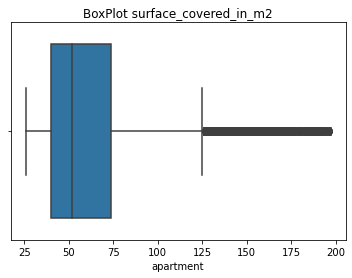

In [44]:
## este dataframe abarca todos los tipos de propiedades pero vamos a quitar solo los outliers de apartment

print("\nCantidad de elementos inciales:", data_prop_type_sup.shape[0])
data_prop_type_sup = data_prop_type_sup.drop(
    mascara_outlier_apartment[mascara_outlier_apartment == False].index
)
print("Cantidad de elementos finales:", data_prop_type_sup.shape[0])

sns.boxplot(data_prop_type_sup.loc[mascara_tipo_apartment, "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("apartment")

------
                                                    Outlier Casas

----------

In [45]:
rango_outlier = rango_extremos(data_house, "surface_covered_in_m2", [2.5, 97.5])
rango_outlier = list(rango_outlier)

mascara_outlier_house = (
    data_house.surface_covered_in_m2.dropna() >= rango_outlier[0]
) & (data_house.surface_covered_in_m2.dropna() <= rango_outlier[1])

print("Cantidad de elementos iniciales: {}".format(data_house.shape[0]))
print(
    "Cantidad de outliers encontrados: {}".format(
        mascara_outlier_house[mascara_outlier_house == False].count()
    )
)
print(
    "Porcentaje de reduccion de la categoría: {}%".format(
        round(
            mascara_outlier_house[mascara_outlier_house == False].count()
            / data_house.shape[0]
            * 100,
            2,
        )
    )
)

range_outlier: type: <class 'pandas.core.series.Series'>, len: 2
Cantidad de elementos iniciales: 33144
Cantidad de outliers encontrados: 892
Porcentaje de reduccion de la categoría: 2.69%



Cantidad de elementos inciales: 98251
Cantidad de elementos finales: 97359


C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'house')

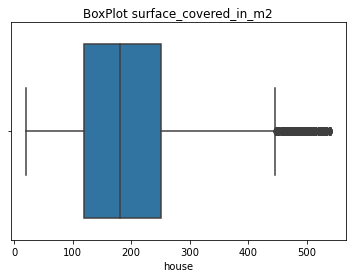

In [46]:
## este dataframe abarca todos los tipos de propiedades pero vamos a quitar solo los outliers de apartment
print("\nCantidad de elementos inciales:", data_prop_type_sup.shape[0])
data_prop_type_sup = data_prop_type_sup.drop(
    mascara_outlier_house[mascara_outlier_house == False].index
)
print("Cantidad de elementos finales:", data_prop_type_sup.shape[0])

sns.boxplot(data_prop_type_sup.loc[mascara_tipo_house, "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("house")

------
                                                    Outlier PH

----------

In [47]:
rango_outlier = rango_extremos(data_ph, "surface_covered_in_m2", [2.5, 97.5])
rango_outlier = list(rango_outlier)

mascara_outlier_ph = (data_ph.surface_covered_in_m2.dropna() >= rango_outlier[0]) & (
    data_ph.surface_covered_in_m2.dropna() <= rango_outlier[1]
)

print("Cantidad de elementos iniciales: {}".format(data_ph.shape[0]))
print(
    "Cantidad de outliers encontrados: {}".format(
        mascara_outlier_ph[mascara_outlier_ph == False].count()
    )
)
print(
    "Porcentaje de reduccion de la categoría: {}%".format(
        round(
            mascara_outlier_ph[mascara_outlier_ph == False].count()
            / data_ph.shape[0]
            * 100,
            2,
        )
    )
)

range_outlier: type: <class 'pandas.core.series.Series'>, len: 2
Cantidad de elementos iniciales: 5125
Cantidad de outliers encontrados: 152
Porcentaje de reduccion de la categoría: 2.97%



Cantidad de elementos inciales: 97359
Cantidad de elementos finales: 97207


C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'PH')

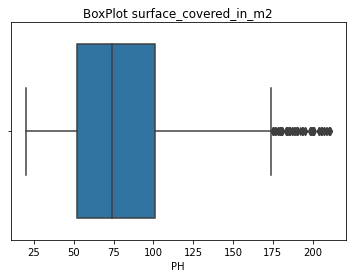

In [48]:
## este dataframe abarca todos los tipos de propiedades pero vamos a quitar solo los outliers de apartment
print("\nCantidad de elementos inciales:", data_prop_type_sup.shape[0])
data_prop_type_sup = data_prop_type_sup.drop(
    mascara_outlier_ph[mascara_outlier_ph == False].index
)
print("Cantidad de elementos finales:", data_prop_type_sup.shape[0])

sns.boxplot(data_prop_type_sup.loc[mascara_tipo_ph, "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("PH")

------
                                                    Outlier Store

----------

In [49]:
rango_outlier = rango_extremos(data_store, "surface_covered_in_m2", [2.5, 96])
rango_outlier = list(rango_outlier)

mascara_outlier_store = (
    data_store.surface_covered_in_m2.dropna() >= rango_outlier[0]
) & (data_store.surface_covered_in_m2.dropna() <= rango_outlier[1])

print("Cantidad de elementos iniciales: {}".format(data_store.shape[0]))
print(
    "Cantidad de outliers encontrados: {}".format(
        mascara_outlier_store[mascara_outlier_store == False].count()
    )
)
print(
    "Porcentaje de reduccion de la categoría: {}%".format(
        round(
            mascara_outlier_store[mascara_outlier_store == False].count()
            / data_store.shape[0]
            * 100,
            2,
        )
    )
)

range_outlier: type: <class 'pandas.core.series.Series'>, len: 2
Cantidad de elementos iniciales: 3020
Cantidad de outliers encontrados: 163
Porcentaje de reduccion de la categoría: 5.4%


Cantidad de elementos inciales: 97207
Cantidad de elementos finales: 97044


C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'store')

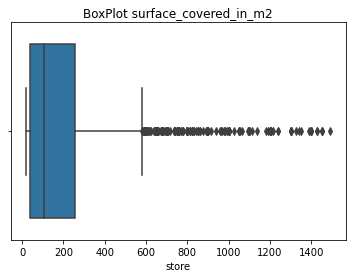

In [50]:
## este dataframe abarca todos los tipos de propiedades pero vamos a quitar solo los outliers de apartment
print("Cantidad de elementos inciales:", data_prop_type_sup.shape[0])
data_prop_type_sup = data_prop_type_sup.drop(
    mascara_outlier_store[mascara_outlier_store == False].index
)
print("Cantidad de elementos finales:", data_prop_type_sup.shape[0])

sns.boxplot(data_prop_type_sup.loc[mascara_tipo_store, "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("store")

----------
**RESUMEN**

---------------

In [51]:
print("Cantidad de outliers totales:")
(
    mascara_outlier_apartment[mascara_outlier_apartment == False].count()
    + mascara_outlier_house[mascara_outlier_house == False].count()
    + mascara_outlier_ph[mascara_outlier_ph == False].count()
    + mascara_outlier_store[mascara_outlier_store == False].count()
)

Cantidad de outliers totales:


3836

In [52]:
data_prop_type_sup[["property_type", "surface_covered_in_m2"]].groupby(
    "property_type"
).aggregate(["count", "max", "median", "mean"])

surface_covered_in_m2                           
                              count     max median        mean
property_type                                                 
PH                             4438   211.0   74.0   80.890717
apartment                     51240   197.0   52.0   62.043326
house                         29358   540.0  180.0  193.891375
store                          2380  1492.0  105.0  200.125630

In [53]:
tabla_prop_type_sup = pd.pivot_table(
    data_prop_type_sup,
    index=("property_type"),
    aggfunc=("count"),
    margins=True,
    margins_name="Total",
)  # , columns=('surface_total_in_m2','surface_covered_in_m2'),dropna=False,aggfunc='count')
tabla_prop_type_sup

,state_name,surface_covered_in_m2,surface_total_in_m2
property_type,,,
PH,4973,4438,3210
apartment,56962,51240,43006
house,32252,29358,21625
store,2857,2380,1991
Total,64476,64476,64476


In [54]:
data_prop_type_sup.isna().sum()

state_name                   0
property_type                0
surface_covered_in_m2     9628
surface_total_in_m2      27212
dtype: int64

## 3.2 RECUPERO DE LOS DATOS NaNs en surface_covered_in_m2

creacion de data_suf_cov_isna:

1) intenamos recuperarlos de la columna superficie total

In [55]:
for i, v in enumerate(data.columns):
    print(i, ") ", v)

0 )  property_type
1 )  place_name
2 )  place_with_parent_names
3 )  state_name
4 )  lat-lon
5 )  lat
6 )  lon
7 )  price
8 )  currency
9 )  price_aprox_local_currency
10 )  price_aprox_usd
11 )  surface_total_in_m2
12 )  surface_covered_in_m2
13 )  price_usd_per_m2
14 )  price_per_m2
15 )  floor
16 )  rooms
17 )  expenses
18 )  properati_url
19 )  description
20 )  title
21 )  image_thumbnail


In [56]:
mask_data = data.surface_covered_in_m2.isna()
data_sur_cov_isna = data.loc[
    mask_data,
    (
        "property_type",
        "surface_total_in_m2",
        "price_per_m2",
        "price_usd_per_m2",
        "price",
        "currency",
        "price_aprox_usd",
    ),
]
print(
    "PRUEBA DIDACTICA: NO ajustamos data_sur_cov_isna con el index de data_prop_type_sup"
)
display(data_sur_cov_isna)
display(data_sur_cov_isna.describe()[:3])

PRUEBA DIDACTICA: NO ajustamos data_sur_cov_isna con el index de data_prop_type_sup


,property_type,surface_total_in_m2,price_per_m2,price_usd_per_m2,price,currency,price_aprox_usd
1,apartment,NaN,NaN,NaN,150000.0,USD,150000.00
3,PH,NaN,NaN,NaN,95000.0,USD,95000.00
9,house,NaN,NaN,NaN,460000.0,ARS,25798.49
10,house,1514.0,NaN,46.235139,70000.0,USD,70000.00
11,house,NaN,NaN,NaN,150000.0,USD,150000.00
...,...,...,...,...,...,...,...
121167,apartment,51.0,NaN,1556.047059,1415000.0,ARS,79358.40
121168,apartment,50.0,NaN,1572.586200,1402000.0,ARS,78629.31
121169,apartment,49.0,NaN,1609.257959,1406000.0,ARS,78853.64
121170,apartment,50.0,NaN,1577.072800,1406000.0,ARS,78853.64


,surface_total_in_m2,price_per_m2,price_usd_per_m2,price,price_aprox_usd
count,5356.000000,0.0,5049.000000,9555.000000,9555.000000
mean,219.356796,NaN,1772.480493,427962.132915,182931.419440
std,2853.566812,NaN,1256.846840,866235.904728,548353.707291


In [57]:
tabla_sur_cov_1 = pd.pivot_table(
    data_sur_cov_isna, index="property_type", aggfunc="count"
)  # , columns=list(data_suf_cov_isna)[:4])#columns=('surface_total_in_m2','price_per_m2','price_usd_per_m2'))#, aggfunc ='count', margins=True, margins_name='Total')
tabla_sur_cov_1

,currency,price,price_aprox_usd,price_per_m2,price_usd_per_m2,surface_total_in_m2
property_type,,,,,,
PH,534,534,534,0,223,229
apartment,5650,5650,5650,0,3232,3459
house,2893,2894,2894,0,1295,1362
store,477,477,477,0,299,306


In [58]:
print(
    "\
       Tenemos 9628 NaNs en superficie cubierta \n\
       Tenemos 0 elementos price_per_m2\n\
       La cuestion es que tenemos una cantidad parecida de superficie total y precio_usd_per_m2\n\
       un poco mas de superficie que de precio_usd_per_m2"
)

       Tenemos 9628 NaNs en superficie cubierta 
       Tenemos 0 elementos price_per_m2
       La cuestion es que tenemos una cantidad parecida de superficie total y precio_usd_per_m2
       un poco mas de superficie que de precio_usd_per_m2


In [59]:
data_sur_cov_isna.drop("price_per_m2", axis=1, inplace=True)

### INFORMACION DE LAS COLUMNAS

- 1. Chequear si la data de surface_covered_in_m2 puedo rescatarla surface_total_in_m2 (), si vale 0 no puede ser reemplazada. Rta: aprox el 50%

- 2. precio / precio_unitario = superficie (asumimos cubierta)

    en dolares: [price_aprox_usd/price_usd_per_m2]

- 3. CHEQUEO CRUZADO DE LOS VALORES RECUPERADOS

In [60]:
# - 1. Chequear si la columna price_per_m2 aporta informacion

recupero = data_sur_cov_isna.shape[0]
print(f"\n\nDatos a recuperar en: recupero = {recupero}, type: {type(recupero)}\n")

print("data_sur_cov_isna.describe():")
display(data_sur_cov_isna.describe()[:3])

print("El size original :", data_sur_cov_isna.shape, "\n")



Datos a recuperar en: recupero = 9628, type: <class 'int'>

data_sur_cov_isna.describe():


,surface_total_in_m2,price_usd_per_m2,price,price_aprox_usd
count,5356.000000,5049.000000,9555.000000,9555.000000
mean,219.356796,1772.480493,427962.132915,182931.419440
std,2853.566812,1256.846840,866235.904728,548353.707291


El size original : (9628, 6) 



In [61]:
(
    data_sur_cov_isna.surface_total_in_m2.isna()
    & data_sur_cov_isna.price_usd_per_m2.notna()
).value_counts()

False    9628
dtype: int64

In [62]:
# - 2. Chequear si la data de surface_covered_in_m2 puedo rescatarla surface_total_in_m2 (), si vale 0 no puede ser reemplazada. Rta: aprox el 50%

data_sur_cov_isna.surface_total_in_m2.value_counts()

0.0       235
40.0      191
50.0      158
45.0      128
70.0      120
         ... 
193.0       1
541.0       1
1075.0      1
459.0       1
171.0       1
Name: surface_total_in_m2, Length: 525, dtype: int64

In [63]:
print("Eliminamos el valor 0")
mask_data = data_sur_cov_isna.surface_total_in_m2 != 0.0
print("El size original :", data_sur_cov_isna.shape)
data_sur_cov_isna = data_sur_cov_isna[mask_data]
display(data_sur_cov_isna)

Eliminamos el valor 0
El size original : (9628, 6)


,property_type,surface_total_in_m2,price_usd_per_m2,price,currency,price_aprox_usd
1,apartment,NaN,NaN,150000.0,USD,150000.00
3,PH,NaN,NaN,95000.0,USD,95000.00
9,house,NaN,NaN,460000.0,ARS,25798.49
10,house,1514.0,46.235139,70000.0,USD,70000.00
11,house,NaN,NaN,150000.0,USD,150000.00
...,...,...,...,...,...,...
121167,apartment,51.0,1556.047059,1415000.0,ARS,79358.40
121168,apartment,50.0,1572.586200,1402000.0,ARS,78629.31
121169,apartment,49.0,1609.257959,1406000.0,ARS,78853.64
121170,apartment,50.0,1577.072800,1406000.0,ARS,78853.64


In [64]:
print(9628 - 9393, "elementos eliminados: son igual a 0 en: surface_total_in_m2")
print("Longitud: data_sur_cov_isna:", data_sur_cov_isna.shape[0])

235 elementos eliminados: son igual a 0 en: surface_total_in_m2
Longitud: data_sur_cov_isna: 9393


In [65]:
print("Eliminamos las entradas Nan en surface_total_in_m2")
mask_data = data_sur_cov_isna.surface_total_in_m2.notna()
print("El size original :", data_sur_cov_isna.shape)
data_sur_cov_isna = data_sur_cov_isna[mask_data]
display(data_sur_cov_isna)

Eliminamos las entradas Nan en surface_total_in_m2
El size original : (9393, 6)


,property_type,surface_total_in_m2,price_usd_per_m2,price,currency,price_aprox_usd
10,house,1514.0,46.235139,70000.0,USD,70000.00
15,house,164.0,1524.390244,250000.0,USD,250000.00
66,apartment,38.0,1918.421053,72900.0,USD,72900.00
142,house,380.0,236.842105,90000.0,USD,90000.00
168,house,195.0,719.021487,2500000.0,ARS,140209.19
...,...,...,...,...,...,...
121167,apartment,51.0,1556.047059,1415000.0,ARS,79358.40
121168,apartment,50.0,1572.586200,1402000.0,ARS,78629.31
121169,apartment,49.0,1609.257959,1406000.0,ARS,78853.64
121170,apartment,50.0,1577.072800,1406000.0,ARS,78853.64


In [66]:
print(9393 - 5121, "elementos eliminados: son NaN en: surface_total_in_m2")
print("Longitud: data_sur_cov_isna:", data_sur_cov_isna.shape[0])

4272 elementos eliminados: son NaN en: surface_total_in_m2
Longitud: data_sur_cov_isna: 5121


**creamos la variable serie_reemplazo, para ir añadiendo los valores que rescatamos para la columna surface_covered_in_m2 para el dataset: data_prop_type_sup**

CHEQUEAR QUE NO PROVOQUEN OUTLIERS 

In [67]:
print(
    "La serie recupero que tiene elementos de superficie total ni ceros ni nan, para reemplazar superficie cubierta"
)
serie_recupero = data_sur_cov_isna.surface_total_in_m2
serie_recupero

La serie recupero que tiene elementos de superficie total ni ceros ni nan, para reemplazar superficie cubierta


10        1514.0
15         164.0
66          38.0
142        380.0
168        195.0
           ...  
121167      51.0
121168      50.0
121169      49.0
121170      50.0
121209     157.0
Name: surface_total_in_m2, Length: 5121, dtype: float64

In [68]:
print("\nAnalisis de repercusion:")
print(f"{len(serie_recupero)} elementos añadidos")
print(f"{round(len(serie_recupero)/recupero*100,2)}% de datos recuperados")
print("Se toma como valido, se procede a remover los elementos obtenidos")


Analisis de repercusion:
5121 elementos añadidos
53.19% de datos recuperados
Se toma como valido, se procede a remover los elementos obtenidos


In [69]:
# - 2. precio / precio_unitario = superficie (asumimos cubierta)
print("\nResetear dataset: data_sur_cov_isna\n")
mask_data = data.surface_covered_in_m2.isna()
data_sur_cov_isna = data.loc[
    mask_data,
    (
        "property_type",
        "price_usd_per_m2",
        "price",
        "currency",
        "price_aprox_local_currency",
        "price_aprox_usd",
    ),
]
data_sur_cov_isna.price_usd_per_m2.fillna(data_price.price_usd_per_m2, inplace=True)

print(f"columna surface_covered_in_m2.isna() - Shape: {data_sur_cov_isna.shape}")
display(data_sur_cov_isna)  # [data_prop_type_sup])#.surface_covered_in_m2.isna()])
display(data_sur_cov_isna.describe()[:3])

print("Usamos la columna 'price_aprox_usd'")
data_sur_cov_isna.drop(
    ["price", "currency", "price_aprox_local_currency"], axis=1, inplace=True
)
display(data_sur_cov_isna)

data_sur_cov_isna["recupero_por_precio"] = (
    data_sur_cov_isna["price_aprox_usd"] / data_sur_cov_isna["price_usd_per_m2"]
)
display(data_sur_cov_isna)

print(
    "La columna recupero tiene un estimado de la superficie cubierta en base al cociente entre precio_aprox en usd y precio_usd_per_m2"
)


Resetear dataset: data_sur_cov_isna

columna surface_covered_in_m2.isna() - Shape: (9628, 6)


,property_type,price_usd_per_m2,price,currency,price_aprox_local_currency,price_aprox_usd
1,apartment,NaN,150000.0,USD,2646675.00,150000.00
3,PH,NaN,95000.0,USD,1676227.50,95000.00
9,house,NaN,460000.0,ARS,455201.45,25798.49
10,house,46.235139,70000.0,USD,1235115.00,70000.00
11,house,NaN,150000.0,USD,2646675.00,150000.00
...,...,...,...,...,...,...
121167,apartment,1556.047059,1415000.0,ARS,1400239.28,79358.40
121168,apartment,1572.586200,1402000.0,ARS,1387374.86,78629.31
121169,apartment,1609.257959,1406000.0,ARS,1391333.05,78853.64
121170,apartment,1577.072800,1406000.0,ARS,1391333.05,78853.64


,price_usd_per_m2,price,price_aprox_local_currency,price_aprox_usd
count,5049.000000,9555.000000,9.555000e+03,9555.000000
mean,1772.480493,427962.132915,3.227733e+06,182931.419440
std,1256.846840,866235.904728,9.675427e+06,548353.707291


Usamos la columna 'price_aprox_usd'


,property_type,price_usd_per_m2,price_aprox_usd
1,apartment,NaN,150000.00
3,PH,NaN,95000.00
9,house,NaN,25798.49
10,house,46.235139,70000.00
11,house,NaN,150000.00
...,...,...,...
121167,apartment,1556.047059,79358.40
121168,apartment,1572.586200,78629.31
121169,apartment,1609.257959,78853.64
121170,apartment,1577.072800,78853.64


,property_type,price_usd_per_m2,price_aprox_usd,recupero_por_precio
1,apartment,NaN,150000.00,NaN
3,PH,NaN,95000.00,NaN
9,house,NaN,25798.49,NaN
10,house,46.235139,70000.00,1514.0
11,house,NaN,150000.00,NaN
...,...,...,...,...
121167,apartment,1556.047059,79358.40,51.0
121168,apartment,1572.586200,78629.31,50.0
121169,apartment,1609.257959,78853.64,49.0
121170,apartment,1577.072800,78853.64,50.0


La columna recupero tiene un estimado de la superficie cubierta en base al cociente entre precio_aprox en usd y precio_usd_per_m2


In [70]:
# COMPARACION DE LAS COLUMNAS QUE RECUPERAMOS COMO VALIDAS
print("COMPARACION DE LOS VALORES RECUPERADOS")
data_prop_type_sup["recupero_por_sup_total"] = serie_recupero
data_prop_type_sup["recupero_por_precio"] = data_sur_cov_isna["recupero_por_precio"]
data_prop_type_sup["chequeo"] = (
    data_prop_type_sup["recupero_por_precio"]
    / data_prop_type_sup["recupero_por_sup_total"]
)

mask_data = (
    data_prop_type_sup.recupero_por_sup_total.notna()
    & data_prop_type_sup.recupero_por_precio.notna()
)


display(data_prop_type_sup.loc[mask_data, "chequeo"].round(2).describe()[:3])
print("Observacion:\n* Igualmente valido por las dos vias")

data_prop_type_sup.drop("chequeo", axis=1, inplace=True)

COMPARACION DE LOS VALORES RECUPERADOS


count    5049.0
mean        1.0
std         0.0
Name: chequeo, dtype: float64

Observacion:
* Igualmente valido por las dos vias


NO PUDIMOS RECUPERAR MAS DATOS

--------------------------

In [71]:
## ESTA ES UNA INTERSECCION DE LOS INDICES DE LA SERIE RECUPERO CON LA COLUMNA DE TIPO DE PROPIEDAD
print("ACTUALIZACION DE COLUMNA SUPERFICIE CUBIERTA")
data_prop_type_sup.surface_covered_in_m2.fillna(
    data_prop_type_sup.recupero_por_precio, inplace=True
)
print("data_prop_type_sup")
porcentaje_nuloss(data_prop_type_sup)

print(
    "Observacion:\n* Aun conservamos 4,72% de datos nulos en la columna superficie cubierta\n* Representan mas de 4000 datos"
)

ACTUALIZACION DE COLUMNA SUPERFICIE CUBIERTA
data_prop_type_sup
>> PORCENTAJE DE DATOS NULOS:



recupero_por_precio       94.80
recupero_por_sup_total    94.72
surface_total_in_m2       28.04
surface_covered_in_m2      4.72
property_type              0.00
state_name                 0.00
dtype: float64

Observacion:
* Aun conservamos 4,72% de datos nulos en la columna superficie cubierta
* Representan mas de 4000 datos


In [72]:
print("data_prop_type_sup")
nuloss(data_prop_type_sup)

data_prop_type_sup
>> DATOS NULOS:



recupero_por_precio       91995
recupero_por_sup_total    91923
surface_total_in_m2       27212
surface_covered_in_m2      4579
property_type                 0
state_name                    0
dtype: int64

In [73]:
print(
    '3798 outliers quitados, 5049 NaNs recuperados, 4579 entradas NaNs, en la columna "surface_covered_in_m2"'
)

3798 outliers quitados, 5049 NaNs recuperados, 4579 entradas NaNs, en la columna "surface_covered_in_m2"


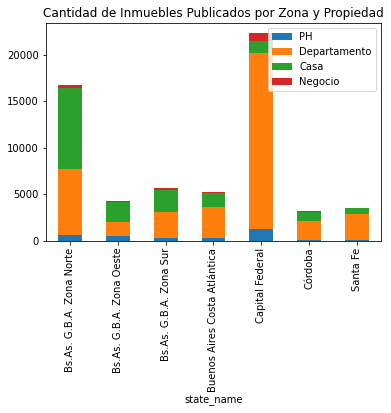

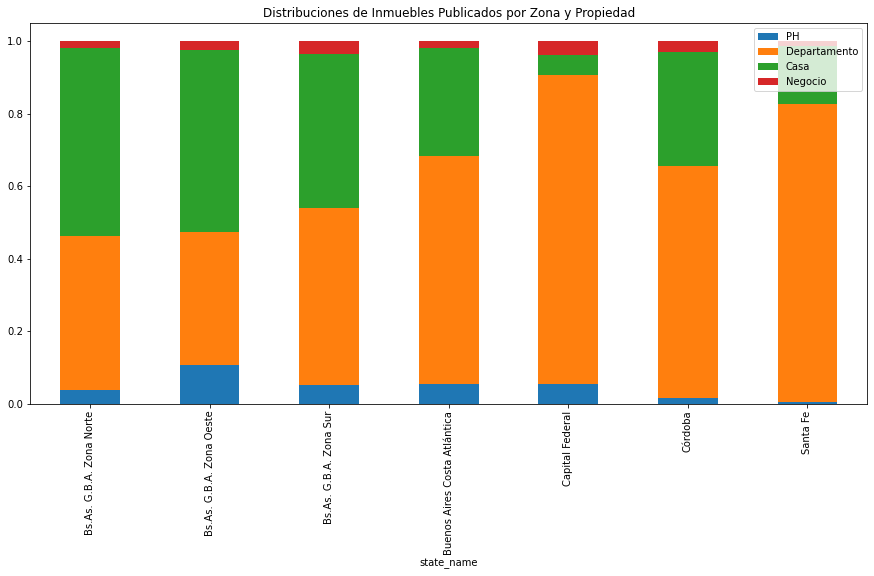

In [74]:
# [11:50 p. m., 10/2/2022] Agustín Helou DH: #El objetivo de esta celda es generar una descripcion rapida a traves de graficos de state_name y property_type


# Creo un nuevo dataframe para trabajar
graficos_state_name = data.copy()
# Selecciono las columnas que voy a utilizar
columnas = [
    "property_type",
    "state_name",
    "place_name",
    "price",
    "surface_covered_in_m2",
    "surface_total_in_m2",
]
# Filtro por aquellas columnas seleccionadas
graficos_state_name = graficos_state_name.filter(columnas, axis=1)
graficos_state_name.dropna(inplace=True)  # Saco los Nan

lista_top_10_state_name = list(
    graficos_state_name.state_name.value_counts().iloc[0:7].index
)  # Tomamos el top 7 de los state_name porque son los unicos que tienen mas de 1000 datos
graficos_state_name = graficos_state_name.set_index(
    "state_name"
)  # Lo pongo como indice para despues filtrarlos con loc

graficos_state_name = graficos_state_name.loc[
    lista_top_10_state_name
]  # Filtro por el top 7
graficos_state_name = graficos_state_name.reset_index(
    drop=False
)  # Reseteo el indice para posteriormente poder hacer un dummies

graficos_state_name = pd.get_dummies(
    graficos_state_name, columns=["property_type"]
)  # Hago un dummies para depues poder saber como se distribuye en cada zona el property_type
graficos_state_name

graficos_state_name = graficos_state_name.groupby(["state_name"])[
    [
        "property_type_PH",
        "property_type_apartment",
        "property_type_house",
        "property_type_store",
    ]
].sum()  # Agrupo y sumo
graficos_state_name.columns = [
    "PH",
    "Departamento",
    "Casa",
    "Negocio",
]  # Cambio los nombres de las columnas para que en el grafico esten en castellan y con mayusculas
graficos_state_name

graficos_state_name.plot(
    kind="bar",
    stacked=True,
    title="Cantidad de Inmuebles Publicados por Zona y Propiedad",
).legend(
    loc="upper right"
)  # Ploteo por cantidad

graficos_state_name["Total"] = graficos_state_name.sum(
    axis=1
)  # Armo totales para despues hacer el % de cada una
graficos_state_name

graficos_state_name = graficos_state_name[
    ["PH", "Departamento", "Casa", "Negocio"]
].div(
    graficos_state_name["Total"], axis=0
)  # Armo porcentuales
graficos_state_name.plot(
    kind="bar",
    figsize=(15, 7),
    stacked=True,
    title="Distribuciones de Inmuebles Publicados por Zona y Propiedad",
).legend(
    loc="upper right"
)  # Ploteo por %

# [11:50 p. m., 10/2/2022] Agustín Helou DH: # Analisis de CABA con Geopandas Precio promedio del M2 y superficie promedio por barrio

# 4. ANALISIS DE DATOS GEOGRAFICOS

Creacion del dataset data_geo

CONTENIDO:

- Busqueda regex:
    - links en la descripcion
    - especificamente googlemaps en la descripcion
        - creacion de la columna googlemaps en data_geo
    - informacion adicional a encontrar la palabra ubicacion en la descripcion
        - crecion de data_ubic
        - modulo exploratorio de datos
            - crecion de data_ubic1, data_ubic2, data_ubic3, y auxiliares
        - creacion de patrones puntuales
        - incorporacion de los matches en data_geo
        
        - Modulo de recuperacion
            - creacion de data_recupero
 

### BUSQUEDA DE LINKS EN LA COLUMNA DESCRIPCION

In [75]:
print(
    """# Armamos una busqueda con links en la descripcion del articulo:

patron = '(?P<links>https://([a-z./0-9A-Z]+))'
regex = re.compile(patron)
links = data_geo.description.apply(lambda x: regex.search(str(x)))

print ('Dentro de la columna "description" encontramos {} links'.format(links.notnull().value_counts()[1]))

links = links.apply(lambda x: x if x is None else x.group('links'))

rta:
Dentro de la columna "description" encontramos 1253 links
"""
)

# Armamos una busqueda con links en la descripcion del articulo:

patron = '(?P<links>https://([a-z./0-9A-Z]+))'
regex = re.compile(patron)
links = data_geo.description.apply(lambda x: regex.search(str(x)))

print ('Dentro de la columna "description" encontramos {} links'.format(links.notnull().value_counts()[1]))

links = links.apply(lambda x: x if x is None else x.group('links'))

rta:
Dentro de la columna "description" encontramos 1253 links



**LECTURA MANUAL:**

Toma caracteres adicionales al final del link.

Se observan paginas de youtube, de facebook, planos de departamentos, googlemaps, etc. 

Por inspeccion algunas entradas redireccionan a la pagina web de otra inmobiliaria sin contenido publicitario. ej: https://goo.gl/8Ht9DD

### BUSQUEDA DE GOOGLEMAPS

In [76]:
# Armamos una busqueda con links de googlemaps en la descripcion del articulo:

patron = "(?P<googlemaps>https://([a-z./0-9]+maps[a-z./0-9]+))"
regex = re.compile(patron, flags=re.IGNORECASE)
googlemaps = df_raw.description.apply(lambda x: regex.search(str(x)))
googlemaps.notnull().value_counts()  # Donde se verifican los valores del print

print(
    'Dentro de la columna "description" encontramos {} matches'.format(
        googlemaps.notnull().value_counts()[1]
    )
)

googlemaps = googlemaps.apply(lambda x: x if x is None else x.group("googlemaps"))
# googlemaps[googlemaps.notnull()]

Dentro de la columna "description" encontramos 47 matches


In [77]:
print(
    """data_geo['googlemaps'] = googlemaps
columnas =['place_name','state_name', 'googlemaps']

display (data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notnull(), columnas])
print ('Numero de match encontrado donde faltan datos geográficos: ',data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notna(),'googlemaps'].shape[0])

rta:
Numero de match encontrado donde faltan datos geográficos:  25
"""
)

data_geo['googlemaps'] = googlemaps
columnas =['place_name','state_name', 'googlemaps']

display (data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notnull(), columnas])
print ('Numero de match encontrado donde faltan datos geográficos: ',data_geo.loc[data_geo['lat-lon'].isnull() & data_geo['googlemaps'].notna(),'googlemaps'].shape[0])

rta:
Numero de match encontrado donde faltan datos geográficos:  25



In [78]:
print(
    "Precaucion que puede haber caracteres adicionales al final del link que corresponden a letras de la palabra siguiente"
)

Precaucion que puede haber caracteres adicionales al final del link que corresponden a letras de la palabra siguiente


#### CONCLUSION 2: googlemaps

Hemos creado el dataframe "data_geo"

Hemos creado la serie links que contiene todos los links https de la descripcion, sin aplicación al desarrollo aún.

Encontramos 45 mapas dentro de las descripcion, y en solo 24 nos falta el dato geográfico. 

# BUSQUEDA DE PATRON UBICACION DENTRO DE LA DESCRIPCION

Creacion del dataframe: data_ubic

tiene que empezar en ubic y leer todo lo que encuentre hasta "en" o "," ":" ,"entre" "sobre" ,"do a"..., hasta encontrar un punto y un espacio y finalizar la busqueda.
Lo que me interesa es el grupo que esta enter "en:" o "," hasta el punto espacio

VARIABLES:
- DATA: Es el main dataset
- DATA_GEO: main dataset de la seccion
- DATA_UBIC: contiene los strings de las entradas donde la columna description dice 'ubic'
- DATA_UBIC1: derivado de data_ubic, resultados no nulos
- DATA_UBIC2: derivado de data_ubic, resultado en la franja ['lat-lon'] isna()
- DATA_UBIC3: derivado de data_ubic, resultado del merge de los 2 anteriores
- DATA_RECUPERO: dataset creado a partir de funciones para visualizar los resultados de determinado patron
- DATA_GEO_UBIC: 

- MASCARA_UBIC1
- MASCARA_UBIC2
- MASCARA_UBIC3

- SERIE_UBIC
- PATRON
- REGEX
- COLUMN_NAME
- SERIE_UBIC_AUX

- SERIE_UBIC_MASCARA1
- SERIE_UBIC_MASCARA3

- COLUMNAS

- INDICE_MASCARA3

### Objetivo: MODULO EXPLORATORIO - RANKINGS

Crear una funcion que elimine entradas que no estén repetidas, y quedarse con 1 ejemplar de los elementos repetidos. 

Luego revisar las entradas y crear patrones para identificar direcciones.

Utilizar esos patrones en todo el data_ubic

***mask = serie.duplicated()***

***df[mask].drop_duplicates()***

In [79]:
## MODULO DE BACKUP DE DATOS EN ARCHIVO CSV

# data_ubic[mascara_ubic][data_geo['lat-lon'].isnull()].to_csv('data_ubic_lat-lon_isna.csv')

# print ('\nCrear un Excel con las 7642 entradas que carecen de informacion geo referencial para hacer una inspeccion visual rapida de los patrones necesarios\n--------------------')
# done

## Conclusion:
PUDIMOS CREAR CIERTOS PATRONES QUE CON GRAN EXACTITUD PUEDEN DEVOLVERNOS VARIOS MATCH DIRECTOS DE LOS QUE NECESITAMOS

Queremos conseguir la mayor cantidad de informacion adicional sobre las 7565 entradas nulas que hemos hecho match

Para acceder a ese espacio del dataset hay que acceder a los indices de la mascara_ubic3

## MODULO DE PATRONES REGEX

---------------------
                                                                        PATRON COMPLEJO
------------------------

***Si por ejemplo buscamos Torres de Husares en Belgrano, nos aparece una pagina de zonaprop que nos da la direccion del complejo "Husares al 2255 Piso 15 2
, Belgrano, Capital Federal"... quedara luego en hacer una limpieza por unique y luego del research buscar las lat-lon de la direccion.***

---------------------
                                                                        PATRON EN BARRIO
------------------------

***La misma aclaracion, es cuestion de buscar el mapa o dentro de google as especificaciones. Ejemplo: Barrio Cerrado San Isidro Labrador, en la web: Italia 5043, Benavidez, Partido de Tigre***

---------------------
                                                                        PATRON SOBRE, EN
------------------------

***ADVERTENCIA***, EL PROXIMO PATRON NO RESULTO TAN PRACTICO

EN LAS VARIABLES CON DOBLE NUMERACION, SE ESTÁN TRANSCRIBRIENDO LOS VALORES MATCHEADOS POR NONES

85862	San Isidro	Bs.As. G.B.A. Zona Norte	NaN	Riobamba 480	
91574	Punilla	Córdoba	NaN	None	PARQUE SIQUIMAN 780	
81593	Córdoba	Córdoba	NaN	None	Felix Frias 350	
65805	Córdoba	Córdoba	NaN	None	General Deheza 63	

---------------------
                                                                        PATRON SOBRE, EN + CALLE
------------------------

---------------------
                                                                        PATRON EN CALLE ENTRE CALLE Y CALLE
------------------------

***La primera busqueda resulta en 442 matches que no son definitivamente concluyentes***

---------------------
                                                                        PATRON BOULEVAR
------------------------
USAMOS data.title

---------------------
                                                                        PATRON AVENIDA
------------------------

---------------------
                                                                        PATRON RESUMEN
------------------------

In [80]:
print(
    """VALORES QUE NOS PERMITEN GEOLOCALIZAR DONDE NO HAYA LAT-LON\n
Cantidad de elementos encontrados por columna
complejo_1       1794
complejo_2       1157
barrio_1         8706
barrio_2         5475
barrio_3         2248
en_sobre_1       2242
en_sobre_2       2731
en_sobre_3       2096
sobre_calle_1     178
sobre_calle_2    2144
sobre_calle_3     276
en_calle         1233
entre            1233
en_bv              62
en_boulevar        68
en_av            2061
en_avenida        189
"""
)

VALORES QUE NOS PERMITEN GEOLOCALIZAR DONDE NO HAYA LAT-LON

Cantidad de elementos encontrados por columna
complejo_1       1794
complejo_2       1157
barrio_1         8706
barrio_2         5475
barrio_3         2248
en_sobre_1       2242
en_sobre_2       2731
en_sobre_3       2096
sobre_calle_1     178
sobre_calle_2    2144
sobre_calle_3     276
en_calle         1233
entre            1233
en_bv              62
en_boulevar        68
en_av            2061
en_avenida        189



## Modulo de recupero:

In [81]:
## MODULO DE BACKUP DE DATOS EN ARCHIVO CSV

# data_geo.to_csv('data_geo.csv')

data_geo = pd.read_csv("data_geo.csv")


recupero_1 = ["complejo_1", "complejo_2"]
recupero_2 = ["barrio_1", "barrio_2", "barrio_3"]
recupero_3 = ["en_sobre_1", "en_sobre_2", "en_sobre_3"]
recupero_4 = ["sobre_calle_1", "sobre_calle_2", "sobre_calle_3"]
recupero_5 = ["en_calle", "entre"]
recupero_6 = ["en_bv", "en_boulevar"]
recupero_7 = ["en_av", "en_avenida"]

recuperados = [
    recupero_1,
    recupero_2,
    recupero_3,
    recupero_4,
    recupero_5,
    recupero_6,
    recupero_7,
]
columnas = (
    recupero_1
    + recupero_2
    + recupero_3
    + recupero_4
    + recupero_5
    + recupero_6
    + recupero_7
)

data_geo_ubic = data_geo.loc[data_geo["lat-lon"].isna(), columnas]

In [82]:
try:
    error_forzado
    # conda install qgrid
    # jupyter nbextension enable --py --sys-prefix qgrid
    # jupyter nbextension enable --py --sys-prefix widgetsnbextension

except:
    print("proximas actualizacion")

try:
    1 / 0
    import qgrid

except:
    print("proximas actualizaciones")

proximas actualizacion
proximas actualizaciones


In [83]:
def menu_visualizacion(data=data_geo, recuperados=recuperados):
    columna = ["lat-lon", "place_name", "state_name"]
    print("Seleccione una opcion:")
    for i, v in enumerate(recuperados):
        print(f"\t{i+1}) patron_{i+1}: {v}")
    opcion = input("\n>> ")
    try:
        opcion = int(opcion)
        if opcion < 1 or opcion > 7:
            print("opcion no valida")
            return
        else:
            columna += recuperados[opcion - 1]
            mask_data = data_geo[recuperados[opcion - 1]].notna().any(axis=1)
            display(data_geo.loc[mask_data, columna])
            data_recupero = data_geo.loc[mask_data, columna]
            return data_recupero
    except:
        print("opcion no validaa")
        return


def apertura_menu():
    print("Desea abrir el modulo de visualizacion dato de ubicacion?")
    check = input("(1:si / 0 :no)\n>> ")
    try:
        int(check)
        if check == "0":
            return
        elif check == "1":
            return True

        else:
            "Operacion abortada"
    except:
        print("Opcion no valida")
        return

In [84]:
### MODULO FUNCIONAL PERO ESTORBA EL TRABAJO FLUIDO
# if apertura_menu():
#    data_recupero = menu_visualizacion()
#    data_recupero['geonames_id'] = False
#    a = 'data_recupero'

In [85]:
print("Continuar ejecucion de codigo")  # INPUT

Continuar ejecucion de codigo


In [86]:
try:
    print(a)
    display(data_recupero)
    print(a)
    nuloss(data_recupero)
    porcentaje_nuloss(data_recupero)
    print("Accion:\n* Base de datos cargada: {}".format(a))
except:
    print("no hay una base de datos cargada")

try:
    widget = qgrid.show_grid(data_recupero)
    widget

except:
    print("Hay actualizacion pendientes")

no hay una base de datos cargada
Hay actualizacion pendientes


In [87]:
print("RESULTADOS BRUTOS DE PATRONES REGEX\n")

# print ('Porcentaje de elementos nulos\n')
# print ('{}%'.format(round(data_geo[columnas].isna().sum() / data_geo[columnas].shape[0] *100,2).to_string()))

print("\nCantidad de entradas por columna:")
print(data_geo[columnas].count().to_string())

RESULTADOS BRUTOS DE PATRONES REGEX


Cantidad de entradas por columna:
complejo_1       1794
complejo_2       1157
barrio_1         8706
barrio_2         5475
barrio_3         2248
en_sobre_1       2242
en_sobre_2       2731
en_sobre_3       2096
sobre_calle_1     178
sobre_calle_2    2144
sobre_calle_3     276
en_calle         1233
entre            1233
en_bv              62
en_boulevar        68
en_av            2061
en_avenida        189


In [88]:
df = pd.DataFrame(
    {
        "Nans": nulos(data_geo[columnas]),
        "Porcentaje Nans": porcentaje_nulos(data_geo[columnas]),
    }
)
df["count"] = data_geo[columnas].shape[0] - df["Nans"]
df

,Nans,Porcentaje Nans,count
en_bv,121158,99.948853,62
en_boulevar,121152,99.943904,68
sobre_calle_1,121042,99.853160,178
en_avenida,121031,99.844085,189
sobre_calle_3,120944,99.772315,276
complejo_2,120063,99.045537,1157
entre,119987,98.982841,1233
en_calle,119987,98.982841,1233
complejo_1,119426,98.520046,1794
en_av,119159,98.299786,2061


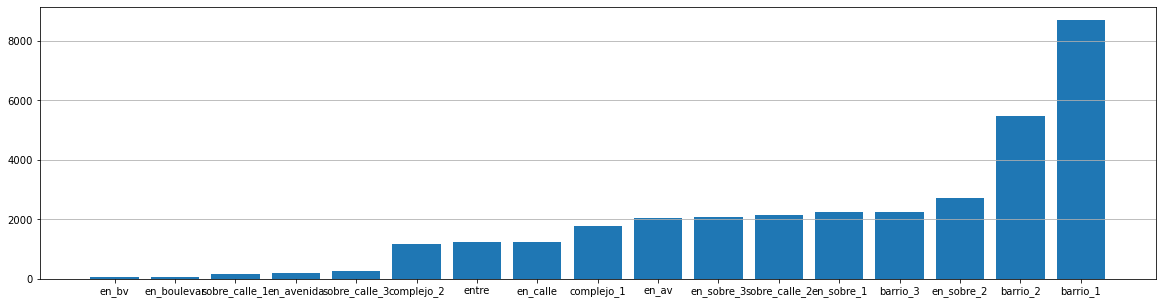

In [89]:
titulo = "repercusion de los patrones"
serie = df["count"]
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.bar(serie.index, serie)
ax.grid(axis="y")
plt.show()

In [90]:
# repercusion de los patrones 2

bins = [0, 1000, 2000, 4000, np.inf]
print("bins: ", bins)
labels = ["menos_1000", "1000_a_2000", "2000_a_4000", "4000_a_>8000"]

df["Categoria_recupero"] = pd.cut(df["count"], bins=bins, labels=labels)

bins:  [0, 1000, 2000, 4000, inf]


In [91]:
agg = df.groupby("Categoria_recupero").size().to_frame()
agg.columns = ["Cantidad patrones"]
agg

,Cantidad patrones
Categoria_recupero,
menos_1000,5
1000_a_2000,4
2000_a_4000,6
4000_a_>8000,2


In [92]:
# print ('CONCLUSION:\n* Pudimos visualizar la respuesta de nuestros patrones\n* Vamos a armar una categoria para los patrones\n* 0 a 500: Bajo\n* 500 a 1000: estrategico\n* los otros 3 seran Barriox2  y sobre_calle\n* asumiendo que esos patrones representan lugares con alto nivel de oferta, la categoria será: demandada')

------------
**CONCLUSION**

---------------

Vamos a etiquetar los matches para ver que nos devuelve el algoritmo

# 5. BUSQUEDA DE GEONAMES_ID

Vamos a completar la columna geonames_id en funcion de place_name 

In [93]:
data_geo_id = df_raw.copy()

columna = ["place_name", "state_name", "lat-lon", "geonames_id"]

columnas = []
for elemento in data_geo_id.columns:
    if elemento not in columna:
        columnas.append(elemento)

data_geo_id.drop(columnas, axis=1, inplace=True)
data_geo_id

,place_name,state_name,geonames_id,lat-lon
0,Mataderos,Capital Federal,3430787.0,"-34.6618237,-58.5088387"
1,La Plata,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295"
2,Mataderos,Capital Federal,3430787.0,"-34.6522615,-58.5229825"
3,Liniers,Capital Federal,3431333.0,"-34.6477969,-58.5164244"
4,Centro,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468"
...,...,...,...,...
121215,Belgrano,Capital Federal,3436077.0,NaN
121216,Beccar,Bs.As. G.B.A. Zona Norte,3436080.0,NaN
121217,Villa Urquiza,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355"
121218,Plaza Colón,Buenos Aires Costa Atlántica,NaN,NaN


In [94]:
# ENTRADAS QUE SON NULAS EN LATLON Y QUE SON NULAS EN GEONAMES_ID
mask_data = data_geo_id["lat-lon"].isna() & data_geo_id.geonames_id.isna()
data_check = data_geo_id[mask_data]
display(data_check)

,place_name,state_name,geonames_id,lat-lon
23,Pilar,Bs.As. G.B.A. Zona Norte,NaN,NaN
104,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
109,Boulogne Sur Mer,Bs.As. G.B.A. Zona Norte,NaN,NaN
261,Las Golondrinas,Bs.As. G.B.A. Zona Sur,NaN,NaN
324,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
...,...,...,...,...
121136,Palermo Hollywood,Capital Federal,NaN,NaN
121137,Palermo Hollywood,Capital Federal,NaN,NaN
121139,Punta Iglesia,Buenos Aires Costa Atlántica,NaN,NaN
121140,Altos de Hudson I,Bs.As. G.B.A. Zona Sur,NaN,NaN


In [95]:
serie_place_name = data_check.place_name
serie_place_name = serie_place_name.unique()
serie_place_name = pd.Series(serie_place_name)
# podria hacerse un intersection index y serias un grosardo
serie_place_name

0                          Pilar
1                       Nordelta
2               Boulogne Sur Mer
3                Las Golondrinas
4                 Manuel Alberti
                 ...            
218                   Mayu Sumaj
219             Potrero de Garay
220                    Mi Granja
221    El Nacional Club de Campo
222            Altos de Hudson I
Length: 223, dtype: object

In [96]:
# quiero verificar si la serie serie_place_name, la puedo ubicar dentro de data_geo_id.place_name para leer el geoname_id
lista = []
geonames_dic = {}
for i, v in enumerate(serie_place_name):
    mask_data = data_geo_id.place_name == v
    a = data_geo_id.loc[mask_data, ["place_name", "geonames_id"]].loc[
        data_geo_id.geonames_id.notna()
    ]
    place_name = list(a["place_name"].unique())
    geonames_id = list(a["geonames_id"].unique())

    result = dict(geonames_id=geonames_id)
    geonames_dic[v] = result


print("a ver")  ##WARNING
# geonames_dic

a ver


In [97]:
lista = []
for i, v in enumerate(geonames_dic.values()):
    for j in v.values():
        if len(j) > 0:
            lista.append(i)

lista

[0,
 6,
 9,
 29,
 36,
 39,
 42,
 49,
 50,
 73,
 82,
 84,
 85,
 88,
 90,
 115,
 136,
 138,
 161,
 166,
 192,
 206]

In [98]:
geonames_id_dic = {}
for i, v in enumerate(geonames_dic.keys()):
    if i in lista:
        for j in geonames_dic[v].values():
            pass
        geonames_id_dic[v] = j

In [99]:
geonames_id_dic

{'Pilar': [3429979.0, 3841149.0],
 'Vicente López': [3427504.0],
 'Malvinas Argentinas': [3845073.0],
 'Tigre': [3427753.0],
 'San Martín': [3836982.0],
 'Villa Mercedes': [3832679.0],
 'San Fernando': [3429088.0],
 'Constitución': [3435257.0],
 'San Carlos': [3837885.0],
 'Lanús': [3432134.0],
 'Lomas de Zamora': [3431270.0],
 'Pompeya': [3430387.0],
 'Azul': [3436197.0],
 'Abasto': [3436521.0],
 'Merlo': [3844377.0, 3430696.0],
 'Berisso': [3436038.0],
 'La Falda': [3851331.0],
 'Chascomús': [3435446.0],
 'San Juan': [3837152.0, 3837213.0],
 'Pergamino': [3841488.0],
 'Santa Catalina': [3836446.0],
 'Junín': [3853352.0]}

In [100]:
# Dentro de la columna place_name if lat-lon.isnull and geonames_id isnull: quiero colocar los ID recien encontrados
for i, v in enumerate(geonames_id_dic.keys()):
    mask_data = data_check.place_name == v
    data_check.loc[mask_data, "geonames_id"] = geonames_id_dic[v][0]
data_check

C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,place_name,state_name,geonames_id,lat-lon
23,Pilar,Bs.As. G.B.A. Zona Norte,3429979.0,NaN
104,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
109,Boulogne Sur Mer,Bs.As. G.B.A. Zona Norte,NaN,NaN
261,Las Golondrinas,Bs.As. G.B.A. Zona Sur,NaN,NaN
324,Nordelta,Bs.As. G.B.A. Zona Norte,NaN,NaN
...,...,...,...,...
121136,Palermo Hollywood,Capital Federal,NaN,NaN
121137,Palermo Hollywood,Capital Federal,NaN,NaN
121139,Punta Iglesia,Buenos Aires Costa Atlántica,NaN,NaN
121140,Altos de Hudson I,Bs.As. G.B.A. Zona Sur,NaN,NaN


In [101]:
display(data_check[data_check.geonames_id.notna()])
print("Observacion:\n* Logramos recuperar 2524 datos de geonames_id")

,place_name,state_name,geonames_id,lat-lon
23,Pilar,Bs.As. G.B.A. Zona Norte,3429979.0,NaN
777,Vicente López,Bs.As. G.B.A. Zona Norte,3427504.0,NaN
3943,Malvinas Argentinas,Bs.As. G.B.A. Zona Norte,3845073.0,NaN
7852,Malvinas Argentinas,Bs.As. G.B.A. Zona Norte,3845073.0,NaN
9375,Tigre,Bs.As. G.B.A. Zona Norte,3427753.0,NaN
...,...,...,...,...
120278,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,3431270.0,NaN
120279,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,3431270.0,NaN
120300,Lanús,Bs.As. G.B.A. Zona Sur,3432134.0,NaN
120960,Lomas de Zamora,Bs.As. G.B.A. Zona Sur,3431270.0,NaN


Observacion:
* Logramos recuperar 2524 datos de geonames_id


In [102]:
serie_recupero = data_check[data_check.geonames_id.notna()].geonames_id
serie_recupero

23        3429979.0
777       3427504.0
3943      3845073.0
7852      3845073.0
9375      3427753.0
            ...    
120278    3431270.0
120279    3431270.0
120300    3432134.0
120960    3431270.0
121132    3427504.0
Name: geonames_id, Length: 2524, dtype: float64

In [103]:
# VALOR ORIGINAL
print("{} datos nulos en geonames_id".format(data_geo_id["geonames_id"].isna().sum()))

18717 datos nulos en geonames_id


In [104]:
# VALOR ACTUAL
data_geo_id["geonames_id"] = data_geo_id["geonames_id"].fillna(serie_recupero)

print("{} datos nulos en geonames_id".format(data_geo_id["geonames_id"].isna().sum()))

16193 datos nulos en geonames_id


In [105]:
18717 - 16193

2524

# 6. MODULO DE EXPLORACION VISUAL

In [106]:
# pd.options.display.max_rows = 4

print("Tomamos el dataset derivado de la seccion 3")

Tomamos el dataset derivado de la seccion 3


In [107]:
print("Analisis comparativo de los dataset: data_price y data_prop_type_sup")

print(
    "objetivo: sin perdida de precision se debe pasar todos los elementos de la columna price_data"
)

Analisis comparativo de los dataset: data_price y data_prop_type_sup
objetivo: sin perdida de precision se debe pasar todos los elementos de la columna price_data


In [108]:
print("DEFINICION DE LAS COLUMNAS A PRESERVAR")
columnas = [
    "lat-lon",
    "lat",
    "lon",
    "floor",
    "rooms",
    "expenses",
    "title",
    "description",
    "properati_url",
    "image_thumbnail",
    "place_with_parent_names",
    "price_aprox_local_currency",
    "price_per_m2",
]

DEFINICION DE LAS COLUMNAS A PRESERVAR


In [109]:
indice_price = data_price.index
indice_prop_type = data_prop_type_sup.index

In [110]:
print("ACONDICIONAMIENTO DE DATA_RECUPERO_PRICE")

## creo dataset, es una interseccion de data y los indices de data_price
# data_recupero_price = data.loc[data.index.intersection(indice_price)].reindex(indice_price)

##completo filas de precio_usd_per_m2 de data_price y surface_covered_in_m2 de data_prop_type_sup
# data_recupero_price.price_aprox_usd.fillna(data_price.price_aprox_usd, inplace=True)
# data_recupero_price.price_usd_per_m2.fillna(data_price.price_usd_per_m2, inplace=True)
# data_recupero_price.surface_covered_in_m2.fillna(data_prop_type_sup.surface_covered_in_m2, inplace=True)

# print ('FRAME SHAPE:', data_recupero_price.shape)
# data_recupero_price = data_recupero_price.drop(columnas, axis=1)
# data_recupero_price.isna().sum()

print("ACONDICIONAMIENTO DE DATA_RECUPERO_PROP_TYPE")

# creo dataset, es una interseccion de data y los indices de data_prop_type_sup
data_recupero_prop_type = data.loc[data.index.intersection(indice_prop_type)].reindex(
    indice_prop_type
)

# completo filas de precio_usd_per_m2 de data_price y surface_covered_in_m2 de data_prop_type_sup
data_recupero_prop_type.price_aprox_usd.fillna(data_price.price_aprox_usd, inplace=True)
data_recupero_prop_type.price_usd_per_m2.fillna(
    data_price.price_usd_per_m2, inplace=True
)
data_recupero_prop_type.surface_covered_in_m2.fillna(
    data_prop_type_sup.surface_covered_in_m2, inplace=True
)

print("FRAME SHAPE:", data_recupero_prop_type.shape)
data_recupero_prop_type.drop(columnas, axis=1, inplace=True)

ACONDICIONAMIENTO DE DATA_RECUPERO_PRICE
ACONDICIONAMIENTO DE DATA_RECUPERO_PROP_TYPE
FRAME SHAPE: (97044, 22)


In [111]:
print("ACONDICIONAMIENTO DE DATA_RECUPERO_PROP_TYPE")

# creo dataset, es una interseccion de data y los indices de data_prop_type_sup
data_recupero_prop_type = data.loc[data.index.intersection(indice_prop_type)].reindex(
    indice_prop_type
)

# completo filas de precio_usd_per_m2 de data_price y surface_covered_in_m2 de data_prop_type_sup
data_recupero_prop_type.price_aprox_usd.fillna(data_price.price_aprox_usd, inplace=True)
data_recupero_prop_type.price_usd_per_m2.fillna(
    data_price.price_usd_per_m2, inplace=True
)
data_recupero_prop_type.surface_covered_in_m2.fillna(
    data_prop_type_sup.surface_covered_in_m2, inplace=True
)

print("FRAME SHAPE:", data_recupero_prop_type.shape)
data_recupero_prop_type.drop(columnas, axis=1, inplace=True)

ACONDICIONAMIENTO DE DATA_RECUPERO_PROP_TYPE
FRAME SHAPE: (97044, 22)


In [112]:
nuloss(data_recupero_prop_type)

>> DATOS NULOS:



surface_total_in_m2      27212
price_usd_per_m2          8455
surface_covered_in_m2     4579
currency                  3950
price_aprox_usd           3949
price                     3949
state_name                   0
place_name                   0
property_type                0
dtype: int64

In [113]:
d = "data_recupero_prop_type"
data_recupero_prop_type

,property_type,place_name,state_name,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
0,PH,Mataderos,Capital Federal,62000.0,USD,62000.0,55.0,40.0,1127.272727
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur,150000.0,USD,150000.0,NaN,NaN,NaN
2,apartment,Mataderos,Capital Federal,72000.0,USD,72000.0,55.0,55.0,1309.090909
3,PH,Liniers,Capital Federal,95000.0,USD,95000.0,NaN,NaN,NaN
4,apartment,Centro,Buenos Aires Costa Atlántica,64000.0,USD,64000.0,35.0,35.0,1828.571429
...,...,...,...,...,...,...,...,...,...
121215,apartment,Belgrano,Capital Federal,870000.0,USD,870000.0,113.0,93.0,7699.115044
121216,house,Beccar,Bs.As. G.B.A. Zona Norte,498000.0,USD,498000.0,360.0,360.0,1383.333333
121217,apartment,Villa Urquiza,Capital Federal,131500.0,USD,131500.0,46.0,39.0,2858.695652
121218,apartment,Plaza Colón,Buenos Aires Costa Atlántica,95900.0,USD,95900.0,48.0,48.0,1997.916667


## Analisis exploratorio

In [114]:
def resumen_dataset(name=d, frame=data):
    print(f"\n\tRESUMEN DEL DATASET: {name}")
    display(frame.head(2))
    display(frame.describe()[:3])
    print(f"\n\tSECCION NULOS DATASET: {name}")
    display(nuloss(data=frame))
    display(porcentaje_nuloss(frame))
    print("Shape del dataset {}".format(frame.shape))

In [115]:
d

'data_recupero_prop_type'

In [116]:
data_check = data_recupero_prop_type.copy()
dc = "data_check"

In [117]:
resumen_dataset(name=dc, frame=data_check)


	RESUMEN DEL DATASET: data_check


,property_type,place_name,state_name,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
0,PH,Mataderos,Capital Federal,62000.0,USD,62000.0,55.0,40.0,1127.272727
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur,150000.0,USD,150000.0,NaN,NaN,NaN


,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
count,93095.000000,93095.000000,69832.000000,92465.000000,88589.000000
mean,437250.756077,222445.938304,213.585061,117.626637,2249.157722
std,861530.552448,294729.726500,1688.145028,693.931273,3169.336237



	SECCION NULOS DATASET: data_check
>> DATOS NULOS:



surface_total_in_m2      27212
price_usd_per_m2          8455
surface_covered_in_m2     4579
currency                  3950
price_aprox_usd           3949
price                     3949
state_name                   0
place_name                   0
property_type                0
dtype: int64

None

>> PORCENTAJE DE DATOS NULOS:



surface_total_in_m2      28.04
price_usd_per_m2          8.71
surface_covered_in_m2     4.72
currency                  4.07
price_aprox_usd           4.07
price                     4.07
state_name                0.00
place_name                0.00
property_type             0.00
dtype: float64

None

Shape del dataset (97044, 9)


In [118]:
### SETEO DATA_CHECK
### AGRUPAMIENTO
data_check = data_recupero_prop_type.copy()
dc = "data_check"

# PRIMERO VAMOS A SACAR TODOS LOS PRECIOS EXPRESADOS EN PESOS
display("Shape original: ", data_check.shape)
mask_data = data_check.currency == "USD"
data_check = data_check[mask_data]
display("Shape actual: ", data_check.shape)

# AHORA VAMOS A CONTROLAR LAS COLUMNAS QUE NECESITAMOS
display(data_check.columns)
print(
    "Resultado:\n* Conservamos: property_type, state_name, price, surface_covered_in_m2, surface_total_in_m2"
)
columnas = [
    "property_type",
    "state_name",
    "price",
    "surface_covered_in_m2",
    "surface_total_in_m2",
]
data_check = data_check.filter(columnas, axis=1)

print("\n", dc)
nuloss(data_check)

# ELIMINAMOS TODOS LOS NULOS
data_check.dropna(inplace=True)
print()
resumen_dataset(name=dc, frame=data_check)

'Shape original: '

(97044, 9)

'Shape actual: '

(81385, 9)

Index(['property_type', 'place_name', 'state_name', 'price', 'currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2'],
      dtype='object')

Resultado:
* Conservamos: property_type, state_name, price, surface_covered_in_m2, surface_total_in_m2

 data_check
>> DATOS NULOS:



surface_total_in_m2      23646
surface_covered_in_m2     3681
price                        0
state_name                   0
property_type                0
dtype: int64



	RESUMEN DEL DATASET: data_check


,property_type,state_name,price,surface_covered_in_m2,surface_total_in_m2
0,PH,Capital Federal,62000.0,40.0,55.0
2,apartment,Capital Federal,72000.0,55.0,55.0


,price,surface_covered_in_m2,surface_total_in_m2
count,57565.000000,57565.000000,57565.000000
mean,245990.898706,125.718197,219.474785
std,327440.701747,875.984289,1723.243779



	SECCION NULOS DATASET: data_check
>> DATOS NULOS:



surface_total_in_m2      0
surface_covered_in_m2    0
price                    0
state_name               0
property_type            0
dtype: int64

None

>> PORCENTAJE DE DATOS NULOS:



surface_total_in_m2      0.0
surface_covered_in_m2    0.0
price                    0.0
state_name               0.0
property_type            0.0
dtype: float64

None

Shape del dataset (57565, 5)


In [119]:
## AGRUPAMOS EL DATA_CHECK 2
columnas = ["price"]
indices = ["property_type", "state_name"]

print("OBJETO: grupo. Name: grupo_usd")
grupo_usd = data_check[columnas + indices].groupby(indices).aggregate(["mean"])
# display (grupo_usd)

resumen_dataset(name="grupo_usd", frame=grupo_usd)
grupo_usd.loc["PH"]

OBJETO: grupo. Name: grupo_usd

	RESUMEN DEL DATASET: grupo_usd


price
                                                 mean
property_type state_name                             
PH            Bs.As. G.B.A. Zona Norte  137818.646766
              Bs.As. G.B.A. Zona Oeste  105757.019438

,price
,mean
count,76.000000
mean,325949.191195
std,228806.838719



	SECCION NULOS DATASET: grupo_usd
>> DATOS NULOS:



price  mean    0
dtype: int64

None

>> PORCENTAJE DE DATOS NULOS:



price  mean    0.0
dtype: float64

None

Shape del dataset (76, 1)


,price
,mean
state_name,
Bs.As. G.B.A. Zona Norte,137818.646766
Bs.As. G.B.A. Zona Oeste,105757.019438
Bs.As. G.B.A. Zona Sur,108315.765472
Buenos Aires Costa Atlántica,90114.040115
Buenos Aires Interior,115638.888889
Capital Federal,180444.739022
Corrientes,134057.142857
Córdoba,224956.521739


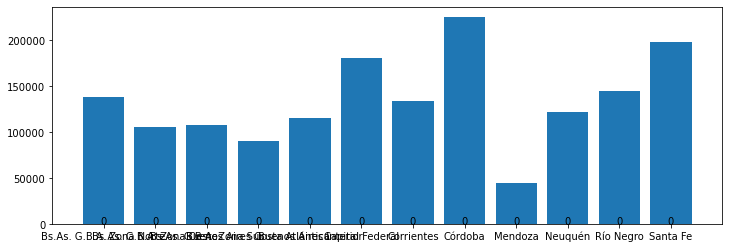

In [120]:
type(grupo_usd.loc["PH"])

# indice = grupo_usd.loc['PH'].index
# indice
type(grupo_usd.loc["PH", "price"])
frame = grupo_usd.loc["PH", "price"]
serie = frame["mean"]

titulo = "Estadisticos de PH por ubicacion"
serie = serie
gaps_columns(titulo, serie)

# type(indice)
# serie = pd.Series(grupo_usd.loc['PH'], index=indice)
# serie

In [121]:
# [11:50 p. m., 10/2/2022] Agustín Helou DH: # Analisis de CABA con Geopandas Precio promedio del M2 y superficie promedio por barrio
try:
    import geopandas
    from shapely import wkt

    barrios = pd.read_csv("barrios.csv")  # Traigo dataset con los datos geograficos
    barrios = barrios.set_index("barrio")
    graficos_caba = (
        data_recupero_prop_type.copy()
    )  # Creo un nuevo dataframe para trabajar
    graficos_caba = graficos_caba.loc[
        (graficos_caba.state_name == "Capital Federal")
        & (graficos_caba.price_usd_per_m2 < 9000)
        & (graficos_caba.price_usd_per_m2 > 300)
    ]  # Filtro los datos que probablemente sean ilogicos (en Boedo habia unp haciendo ruido)
    graficos_caba = graficos_caba[
        ["state_name", "place_name", "price_usd_per_m2", "surface_total_in_m2"]
    ]  # Selecciono las columnas que voy a utilizar
    graficos_caba.place_name = (
        graficos_caba.place_name.str.upper()
    )  # Paso todo a mayusculas como esta en el Dataset de barrios
    graficos_caba = graficos_caba.groupby(
        ["place_name"]
    ).mean()  # Agrupo y armo los promedios
    graficos_caba = pd.merge(
        graficos_caba, barrios, left_index=True, right_index=True
    )  # Uno los dataframes
    fig, ax = plt.subplots(figsize=(10, 10))  # Creo el espacio para el grafico
    fig.suptitle(
        "Valor promedio del M2 por Barrio en CABA", fontweight="bold", size=15
    )  # Pongo titulo
    graficos_caba = geopandas.GeoDataFrame(
        graficos_caba, geometry=graficos_caba.WKT.apply(wkt.loads)
    )  # Lo paso a geopandas dataframe
    graficos_caba.plot(ax=ax, color="white", edgecolor="black")  # Ploteo los barrios
    graficos_caba.plot(
        ax=ax, column="price_usd_per_m2", cmap="Greens", legend=True, edgecolor="black"
    )  # Coloreo por Precio M2 Promedio
    fig, ax = plt.subplots(figsize=(10, 10))  # Creo el espacio para el grafico
    fig.suptitle(
        "Cantidad promedio de M2 por propiedad por Barrio en CABA",
        fontweight="bold",
        size=15,
    )  # Pongo titulo
    graficos_caba = geopandas.GeoDataFrame(
        graficos_caba, geometry=graficos_caba.WKT.apply(wkt.loads)
    )  # Lo paso a geopandas dataframe
    graficos_caba.plot(ax=ax, color="white", edgecolor="black")  # Ploteo los barrios
    graficos_caba.plot(
        ax=ax,
        column="surface_total_in_m2",
        cmap="Greys",
        legend=True,
        edgecolor="black",
    )  # Coloreo por Superficie M2 Promedio
except:
    print("cargar Kernel de geopandas")

cargar Kernel de geopandas


In [122]:
try:
    graficos_caba
except:
    print("cargar Kernel de geopandas")

cargar Kernel de geopandas


# 7. MODULO DE RECONSTRUCCION DEL DATASET

## FUNCIONES ANTERIORES

In [123]:
# ····#····#····#····#····#····#····#
#    MODULO VISUALIZACION DATASET  #
# ····#····#····#····#····#····#····#


def resumen_dataset(name=d, frame=data):  # INFORMACION GENERAL DEL DATASET
    print(f"\n\tRESUMEN DEL DATASET: {name}")
    print(".head(2)")
    display(frame.head(2))
    print("describe()")
    display(frame.describe()[:3])
    print(f"\n\tSECCION NULOS DATASET: {name}")
    display(nuloss(data=frame))
    display(porcentaje_nuloss(frame))
    print("Shape del dataset {}".format(frame.shape))


def nulos(data=data):  # CREA VARIABLE NULOS
    result = data.isnull().sum().sort_values(ascending=False)
    return result


def nuloss(data=data):  # MUESTRA VARIABLE NULOS
    print(">> DATOS NULOS:\n")
    display(data.isnull().sum().sort_values(ascending=False))
    return


def porcentaje_nulos(data=data):  # CREA VARIABLE
    result = data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100
    return result


def porcentaje_nuloss(data=data):  # MUESTRA VARIABLE
    print(">> PORCENTAJE DE DATOS NULOS:\n")
    display(
        round(data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100, 2)
    )
    return


# FUNCION PARA CREAR LA COLUMNA DE COUNTS: REVISAR REPERCUSION DE DE PATRONES

# ····#····#····#····#····#
#   MODULO INSPECCION
# ····#····#····#····#····#


def prueba_isna(frame, label_list, label):
    print(f"Comparacion de cantidad de NaN types en funcion de la columna {label}")
    mascara_comparativa = frame[label].isna()
    print(frame.loc[mascara_comparativa, label_list].isna().sum().to_string())


# entragas un dataframe, la lista de columnas que queres chequear, y la label de la columna que se toma de referencia


# ····#····#····#····#····#
# MODULO INTERACTIVO PARA CREACIOND DE VARIABLES
# ····#····#····#····#····#

# logica de aplicacion:
# if apertura_menu():
# data_nueva = menu_visualizacion()


def menu_visualizacion(data=data_geo, recuperados=recuperados):
    columna = ["lat-lon", "place_name", "state_name"]
    print("Seleccione una opcion:")
    for i, v in enumerate(recuperados):
        print(f"\t{i+1}) patron_{i+1}: {v}")
    opcion = input("\n>> ")
    try:
        opcion = int(opcion)
        if opcion < 1 or opcion > 7:
            print("opcion no valida")
            return
        else:
            columna += recuperados[opcion - 1]
            mask_data = data_geo[recuperados[opcion - 1]].notna().any(axis=1)
            display(data_geo.loc[mask_data, columna])
            data_recupero = data_geo.loc[mask_data, columna]
            return data_recupero
    except:
        print("opcion no validaa")
        return


def apertura_menu():
    print("Desea abrir el modulo de visualizacion dato de ubicacion?")
    check = input("(1:si / 0 :no)\n>> ")
    try:
        int(check)
        if check == "0":
            return
        elif check == "1":
            return True

        else:
            "Operacion abortada"
    except:
        print("Opcion no valida")
        return


# ····#····#····#····#····#  SUMAR ACA LOS GRAFICOS DE DANIELA
#   MODULO GRAFICOS
# ····#····#····#····#····#


def gaps_columns(titulo, serie):
    fig, ax = plt.subplots(figsize=(12, 4))
    barras = plt.bar(serie.index, serie)

    for barra in barras:
        x = barra.get_x()
        y = barra.get_y()
        ancho = barra.get_width()
        plt.text(x + ancho / 2, y, round(y, 2), fontsize=10, color="black", ha="center")
    plt.show()


# Crea un grafico DE BARRAS


# ····#····#····#····#····#
#   MODULO OUTLIER
# ····#····#····#····#····#


def rango_extremos(frame, label, quant_list=[2.5, 97.5]):
    for i, v in enumerate(quant_list):
        if v < 0 or v > 1:
            quant_list[i] = v / 100

    rango_outlier = frame[label].quantile(quant_list)
    print(
        "range_outlier: type: {}, len: {}".format(
            type(rango_outlier), len(rango_outlier)
        )
    )
    return list(rango_outlier)


def mascara_outlier(frame, label, rango_outlier):
    if rango_outlier == [0.0, 0.0]:
        rango_outlier = rango_extremos(frame=frame, label=label)
    mascara_outlier = (
        (frame[label].dropna() >= rango_outlier[0])
        & (frame[label].dropna() <= rango_outlier[1])
    ).index
    return mascara_outlier


# ····#····#····#····#····#
#  PROXIMAS ACTUALIZACIONES
# ····#····#····#····#····#
indices = []


def work_list(columnas=columnas, indices=indices):
    work_list = []
    work_list = columnas + indices
    return work_list


def work_listt(lista=work_list()):
    print(lista)


# Crea una lista de las columnas necesarias para el analisis: funcion: groupby

# def crea_busqueda_iterada
# for i in range(3):
#    i += 1
#    column_name = 'ubic'+str(i)
#    serie_ubic_aux = serie_ubic.apply(lambda x: x if x is None else x.group('ubic'+str(i)))
#    data_ubic.insert(loc=i-1, column=column_name, value=serie_ubic_aux)

# def definiar_categoria(bins,labels):


# iterar series para añadirsela a un dataframe limpio - proviene de celda 85

## FUNCIONES NUEVAS

## 7.1 reconstruccion del dataset

In [124]:
# ····#····#····#····#····#····#····#
#   NO EJECUTAR ESTA CELDA VINIENDO DESDE ABAJO
data_v1 = data.copy()

# ····#····#····#····#····#····#····#

In [125]:
data = df_raw.copy()
d = "data"
# resumen_dataset('data',data)

##  7.2 ANALISIS PRECIO: COTIZACION DIVISA, COTIZACION INMUEBLE, CRITERIOS LOGICOS

COLUMNAS:
    
    - (price, currency)
    - price_aprox_usd
    - price_usd_per_m2
    - price_aprox_local_currency
    - price_per_m2
    
COLUMNAS DE TRABAJO AUXILIAR:

    - surface_total_in_m2
    - surface_covered_in_m2
    
COLUMNAS PROYECTADAS A SER CREADAS:

    - surface_recovery = tomar un criterio general de seleccion para todos los cálculos
    - diff_change = columna check: la diferencia entre dos valores, o el cociente, o el delta porcentual
    - control_cruzado =
    
FUTUROS RECUPEROS:

    - tupla_recupero_1

In [126]:
# PARTE 1
mask_data = data.surface_total_in_m2.notna() & data.surface_covered_in_m2.notna()
mask_data = (
    data[mask_data].surface_total_in_m2 >= data[mask_data].surface_covered_in_m2
)  # comprobamos que haya logica Total > Cubierto
data["surface_total_in_m2"].fillna(0, inplace=True)
data["surface_covered_in_m2"].fillna(0, inplace=True)
data["surface_total_in_m2_mod"] = np.maximum(
    data.surface_total_in_m2, data.surface_covered_in_m2
)
data["surface_total_in_m2_mod"] = data["surface_total_in_m2_mod"].replace(0, np.nan)
data["surface_total_in_m2"] = data["surface_total_in_m2"].replace(0, np.nan)
data["surface_covered_in_m2"] = data["surface_covered_in_m2"].replace(0, np.nan)
# CREAMOS LA COLUMNA surface_total_in_m2_mod, y reemplazamos todos los valores cero por nans en las columnas surface_total_in_m2 y surface_covered_in_m2
# resumen_dataset('data',data)

# PARTE 2: #comprobamos que hay valores ilogicos porque price_usd_per_m2 es mayor a price_per_m2 que esta en pesos
mask_data = data.currency == "ARS"
data.drop(
    (data[mask_data].loc[data.price_per_m2 < data.price_usd_per_m2]).index, inplace=True
)

# PARTE 3: DEFINICION DEL TIPO DE CAMBIO
tc = np.mean(
    data.price_aprox_local_currency / data.price_aprox_usd
)  # tc promedio 17.6444


# PARTE 4: ANALISIS DE FIABILIDAD DE price_aprox_usd
data.loc[data.currency == "ARS", "control_cruzado_precio_usd"] = data.price / tc
data["diff_pct_change"] = (
    data["control_cruzado_precio_usd"] / data["price_aprox_usd"] - 1
) * 100
# podemos concluir que es una columna confiable para tomar como precio en usd con un rango de desvio relativamente bajo de 1.05% a -2.84%

# PARTE 5: PASAR LA COLUMNA price A UN SOLO TIPO DE CAMBIO
mask_data = data.currency == "ARS"
data.loc[mask_data, "price"] = data[mask_data].price / tc
data.loc[mask_data, "currency"] = "USD"
# ACLARACION A TENER EN CUENTA: HAY 20414 entradas cuya currency está en Nan
mask_data = data.loc[:, "currency"] != "USD"
mask_data = data.loc[mask_data, "currency"].dropna().index
serie_recupero_1 = mask_data
string_recupero_1 = "Type <Index>: HAY 3 PROPIEDADES QUE NO ESTAN EXPRESADAS NI EN DOLARES NI EN PESOS ARGENTINOS"
tupla_recupero_1 = (serie_recupero_1, string_recupero_1)
data.drop(mask_data, inplace=True)

# PARTE 6: ELIMINAMOS 870 VALORES INCOHERENTES: CRITERIO: RANGO DE DESVIO, SOBRE: PRECIO/SUPERICIE
data["control_cruzado_precio_m2_usd"] = (
    data["price_aprox_usd"] / data["surface_total_in_m2_mod"]
)
data["diff_pct_change_2"] = (
    data["control_cruzado_precio_m2_usd"] / data["price_usd_per_m2"] - 1
) * 100
# ' Elimino del dataset de trabajo los que tenian desvios de +- 4.75%'
mask_data = data.loc[
    (data["diff_pct_change_2"] < -4.75) | (data["diff_pct_change_2"] > 4.75)
].index  # saco las que tienen desvio de +-5%
data.drop(mask_data, inplace=True)

# PARTE 7: 'ANALISIS DE RECUPERO price_usd_per_m2 POR price_aprox_usd/surface_total_in_m2_mod'
mask_data = (
    data.price_usd_per_m2.isna()
    & data.price_aprox_usd.notna()
    & data.surface_total_in_m2_mod.notna()
)
data["recupero"] = (
    data.loc[mask_data, "price_aprox_usd"]
    / data.loc[mask_data, "surface_total_in_m2_mod"]
)
data["price_usd_per_m2"].fillna(data["recupero"], inplace=True)

In [127]:
"""   PORCENTAJE DE DATOS NULOS
    VERSION ORIGINAL                        VERSION ACTUAL
price_usd_per_m2              43.39  /  price_usd_per_m2                 23.51
surface_total_in_m2           32.44  /  surface_total_in_m2              33.00
price_per_m2                  27.69  /  price_per_m2                     27.89
currency                      16.84  /  currency                         16.96
price_aprox_usd               16.84  /  price_aprox_usd                  16.96
price_aprox_local_currency    16.84  /  price_aprox_local_currency       16.96
price                         16.84  /  price                            16.96
surface_covered_in_m2         16.42  /  surface_covered_in_m2            16.54


NUEVAS COLUMNAS CREADAS
diff_pct_change                  89.08
control_cruzado_precio_usd       89.08
recupero                         79.80
diff_pct_change_2                43.71
control_cruzado_precio_m2_usd    23.51
surface_total_in_m2_mod          10.59
""";

In [128]:
columnas = [
    "diff_pct_change",
    "control_cruzado_precio_usd",
    "recupero",
    "diff_pct_change_2",
    "control_cruzado_precio_m2_usd",
    "surface_total_in_m2_mod",
]
data_price = data.filter(columnas, axis=1)
data.drop(columnas, axis=1, inplace=True)

## 7.3 ANALISIS SUPERFICIE: TIPO DE PROPIEDAD, TIPO DE SUPERFICIE, MODELIZACION ESTADISTICA

COLUMNAS:

    - state_name
    - surface_covered_in_m2
    - surface_total_in_m2
    - property_type
    - price_aprox_in_m2
    - price_usd_per_m2

In [129]:
columnas = [
    "state_name",
    "surface_covered_in_m2",
    "property_type",
    "surface_total_in_m2",
]
columnas2 = ["price_aprox_usd", "price_usd_per_m2"]

data_sup = data.copy()
data_sup = data_sup.loc[:, columnas + columnas2]
d = "data_sup"

print("\n\nACTUALIZANDO DATASET AL DE TRABAJO\n")
data_drop = data_sup.drop(columnas, axis=1)
data_sup = data_sup.drop(columnas2, axis=1)
# resumen_dataset(d,data_sup)



ACTUALIZANDO DATASET AL DE TRABAJO



In [130]:
# NO ESTA TERMINADO - NO SE PUEDE SUBIR AUN
def rango_extremos(frame, label, quant_list=[2.5, 97.5]):
    for i, v in enumerate(quant_list):
        if v < 0 or v > 1:
            quant_list[i] = v / 100

    rango_outlier = frame[label].quantile(quant_list)
    rango_outlier = list(rango_outlier)
    print(
        "range_outlier: type: {}, len: {}, value: {}".format(
            type(rango_outlier), len(rango_outlier), rango_outlier
        )
    )
    return rango_outlier


def mascara_outlier_index_list(
    frame, label, rango_outlier
):  # el problema que tengo es sacarme solo True de encima y quedarme con el indice de los False -
    mascara_outlier = (frame[label].dropna() >= rango_outlier[0]) & (
        frame[label].dropna() <= rango_outlier[1]
    )  # ME QUEDO CON EL RANGO FALSE
    # resulta: mascara booleana quiero quedarme con el indice de los False
    lista_elementos = mascara_outlier.values
    lista_indices = mascara_outlier.index
    lista_elementos = list(lista_elementos)
    lista_indices = list(lista_indices)
    lista_result = []
    for i, booleano in enumerate(lista_elementos):
        if booleano == False:
            lista_result.append(lista_indices[i])
    return lista_result


# def mascara_outlier(frame, label, rango_outlier):
#    if rango_outlier == [0.0 , 0.0]:         # <----------------- esta parte esta buena para tener un valro random
#        rango_outlier = rango_extremos(frame=frame, label=label)
#    frame = frame[label].dropna()
#    mascara_outlier = ((frame[label] >= rango_outlier[0]) & (frame[label] <= rango_outlier[1])).index
#    return mascara_outlier

In [131]:
print("EXCLUSION DE OUTLIERS\n")
serie_check = data_sup.property_type
# lista_check = list(serie_check)
set_check = set(list(serie_check))
len(set_check)
type(set_check)
########################PROGRAMA PRINCIPAL ################################
lista_rangos = []
lista_drops = []
print("orden de la iteracion: {}".format(set_check))
for i, elemento in enumerate(set_check):
    print("--------------\nITERACION N: {}\n--------------".format(i + 1))

    if elemento == "store":
        mascara_iter_1 = serie_check == elemento
        rango_outlier = rango_extremos(
            data_sup.loc[mascara_iter_1], "surface_covered_in_m2", [2.5, 95]
        )
    else:
        mascara_iter_1 = serie_check == elemento
        rango_outlier = rango_extremos(
            data_sup.loc[mascara_iter_1], "surface_covered_in_m2"
        )

    lista_rangos.append(rango_outlier)

    serie_outlier = data_sup.surface_covered_in_m2.loc[mascara_iter_1]
    print("elementos nans y tipo {} en serie_outlier:".format(elemento))
    display(serie_outlier)
    print(f"\n\nQuitamos los nans tipo {elemento}, de la columna surface_covered_in_m2")
    mask_data = data_sup.loc[
        serie_outlier.index, "surface_covered_in_m2"
    ].dropna()  ##TODOS LOS TIPO ELEMENTOS
    display(mask_data)
    print("Dataset por tipo {} sin nan".format(elemento))
    display(data_sup.loc[mask_data.index])  ## prueba impresion
    indice_outlier = mascara_outlier_index_list(
        data_sup.loc[mask_data.index], "surface_covered_in_m2", rango_outlier
    )
    print(
        f"\n\ndataset <fila: {elemento}> con los valores de outliers en surface_covered_in_m2\n"
    )
    display(data_sup.loc[indice_outlier])  ## prueba impresion
    lista_drops.append(indice_outlier)


for lista_indices in lista_drops:
    data_sup.drop(lista_indices, inplace=True)

print(
    "--------------------------------------------------------------------------------\nDataset final:"
)
data_sup

# OBSERVACION: AL EJECUTAR SUCESIVAMENTE ESTA CELDA VA TOMANDO OUTLIERS NUEVOS LUEGO DE HABER REMOVIDO LOS ANTERIORES - AÑADIR GRAFICOS

EXCLUSION DE OUTLIERS

orden de la iteracion: {'house', 'apartment', 'PH', 'store'}
--------------
ITERACION N: 1
--------------
range_outlier: type: <class 'list'>, len: 2, value: [20.0, 550.0]
elementos nans y tipo house en serie_outlier:


5           NaN
9           NaN
10          NaN
11          NaN
15          NaN
          ...  
121208    178.0
121210    120.0
121212    420.0
121213    600.0
121216    360.0
Name: surface_covered_in_m2, Length: 39743, dtype: float64



Quitamos los nans tipo house, de la columna surface_covered_in_m2


18        270.0
20        148.0
22        200.0
26        190.0
27        425.0
          ...  
121208    178.0
121210    120.0
121212    420.0
121213    600.0
121216    360.0
Name: surface_covered_in_m2, Length: 32986, dtype: float64

Dataset por tipo house sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
18,Bs.As. G.B.A. Zona Norte,270.0,house,270.0
20,Córdoba,148.0,house,148.0
22,Bs.As. G.B.A. Zona Oeste,200.0,house,200.0
26,Bs.As. G.B.A. Zona Norte,190.0,house,230.0
27,Bs.As. G.B.A. Zona Norte,425.0,house,425.0
...,...,...,...,...
121208,Bs.As. G.B.A. Zona Norte,178.0,house,NaN
121210,Bs.As. G.B.A. Zona Norte,120.0,house,NaN
121212,Bs.As. G.B.A. Zona Norte,420.0,house,420.0
121213,Bs.As. G.B.A. Zona Norte,600.0,house,600.0




dataset <fila: house> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
58,Bs.As. G.B.A. Zona Norte,800.0,house,1300.0
105,Bs.As. G.B.A. Zona Norte,800.0,house,1280.0
106,Bs.As. G.B.A. Zona Norte,800.0,house,1300.0
107,Bs.As. G.B.A. Zona Norte,800.0,house,1300.0
152,Bs.As. G.B.A. Zona Norte,612.0,house,NaN
...,...,...,...,...
120566,Córdoba,1150.0,house,NaN
120645,Córdoba,580.0,house,NaN
120659,Córdoba,621.0,house,NaN
120673,Córdoba,600.0,house,NaN


--------------
ITERACION N: 2
--------------
range_outlier: type: <class 'list'>, len: 2, value: [26.0, 192.0]
elementos nans y tipo apartment en serie_outlier:


1           NaN
2          55.0
4          35.0
7          40.0
8          60.0
          ...  
121211    205.0
121215     93.0
121217     39.0
121218     48.0
121219     77.0
Name: surface_covered_in_m2, Length: 70781, dtype: float64



Quitamos los nans tipo apartment, de la columna surface_covered_in_m2


2          55.0
4          35.0
7          40.0
8          60.0
12         36.0
          ...  
121211    205.0
121215     93.0
121217     39.0
121218     48.0
121219     77.0
Name: surface_covered_in_m2, Length: 59451, dtype: float64

Dataset por tipo apartment sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
2,Capital Federal,55.0,apartment,55.0
4,Buenos Aires Costa Atlántica,35.0,apartment,35.0
7,Capital Federal,40.0,apartment,45.0
8,Capital Federal,60.0,apartment,65.0
12,Bs.As. G.B.A. Zona Norte,36.0,apartment,39.0
...,...,...,...,...
121211,Bs.As. G.B.A. Zona Norte,205.0,apartment,205.0
121215,Capital Federal,93.0,apartment,113.0
121217,Capital Federal,39.0,apartment,46.0
121218,Buenos Aires Costa Atlántica,48.0,apartment,48.0




dataset <fila: apartment> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
197,Buenos Aires Interior,270.0,apartment,270.0
200,Capital Federal,196.0,apartment,196.0
219,Capital Federal,300.0,apartment,310.0
223,Capital Federal,250.0,apartment,270.0
281,Buenos Aires Costa Atlántica,23.0,apartment,NaN
...,...,...,...,...
120956,Santa Fe,25.0,apartment,25.0
121109,Santa Fe,25.0,apartment,27.0
121121,Capital Federal,24.0,apartment,29.0
121135,Capital Federal,19.0,apartment,80.0


--------------
ITERACION N: 3
--------------
range_outlier: type: <class 'list'>, len: 2, value: [20.0, 210.0]
elementos nans y tipo PH en serie_outlier:


0          40.0
3           NaN
6          78.0
16         98.0
34        160.0
          ...  
120972    206.0
121081     83.0
121104    100.0
121130     12.0
121148    185.0
Name: surface_covered_in_m2, Length: 5712, dtype: float64



Quitamos los nans tipo PH, de la columna surface_covered_in_m2


0          40.0
6          78.0
16         98.0
34        160.0
46        140.0
          ...  
120972    206.0
121081     83.0
121104    100.0
121130     12.0
121148    185.0
Name: surface_covered_in_m2, Length: 4874, dtype: float64

Dataset por tipo PH sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
0,Capital Federal,40.0,PH,55.0
6,Bs.As. G.B.A. Zona Norte,78.0,PH,106.0
16,Capital Federal,98.0,PH,140.0
34,Bs.As. G.B.A. Zona Norte,160.0,PH,172.0
46,Bs.As. G.B.A. Zona Norte,140.0,PH,140.0
...,...,...,...,...
120972,Capital Federal,206.0,PH,NaN
121081,Bs.As. G.B.A. Zona Sur,83.0,PH,NaN
121104,Bs.As. G.B.A. Zona Norte,100.0,PH,NaN
121130,Bs.As. G.B.A. Zona Sur,12.0,PH,NaN




dataset <fila: PH> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
135,Bs.As. G.B.A. Zona Norte,260.0,PH,NaN
4770,Capital Federal,324.0,PH,NaN
4866,Capital Federal,212.0,PH,212.0
4887,Capital Federal,230.0,PH,250.0
5351,Bs.As. G.B.A. Zona Sur,282.0,PH,407.0
...,...,...,...,...
117881,Bs.As. G.B.A. Zona Norte,224.0,PH,NaN
119227,Bs.As. G.B.A. Zona Oeste,255.0,PH,255.0
120692,Capital Federal,231.0,PH,231.0
120777,Capital Federal,220.0,PH,220.0


--------------
ITERACION N: 4
--------------
range_outlier: type: <class 'list'>, len: 2, value: [18.0, 1398.1999999999975]
elementos nans y tipo store en serie_outlier:


57         30.0
65          NaN
95        180.0
183         NaN
204       103.0
          ...  
120854    122.0
120929      NaN
121073    169.0
121125    403.0
121214    123.0
Name: surface_covered_in_m2, Length: 4106, dtype: float64



Quitamos los nans tipo store, de la columna surface_covered_in_m2


57         30.0
95        180.0
204       103.0
215        80.0
277        20.0
          ...  
120853    144.0
120854    122.0
121073    169.0
121125    403.0
121214    123.0
Name: surface_covered_in_m2, Length: 3125, dtype: float64

Dataset por tipo store sin nan


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
57,Capital Federal,30.0,store,30.0
95,Córdoba,180.0,store,NaN
204,Capital Federal,103.0,store,103.0
215,Capital Federal,80.0,store,80.0
277,Capital Federal,20.0,store,NaN
...,...,...,...,...
120853,Capital Federal,144.0,store,154.0
120854,Capital Federal,122.0,store,122.0
121073,Capital Federal,169.0,store,169.0
121125,Capital Federal,403.0,store,403.0




dataset <fila: store> con los valores de outliers en surface_covered_in_m2



,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
3462,Bs.As. G.B.A. Zona Oeste,1.0,store,490.0
3468,Bs.As. G.B.A. Zona Oeste,1.0,store,NaN
3775,Córdoba,1.0,store,NaN
5533,Bs.As. G.B.A. Zona Norte,1846.0,store,NaN
5600,Buenos Aires Costa Atlántica,3000.0,store,3000.0
...,...,...,...,...
108485,Bs.As. G.B.A. Zona Sur,15.0,store,NaN
109320,Bs.As. G.B.A. Zona Norte,1400.0,store,1400.0
112645,Capital Federal,2000.0,store,2000.0
118714,Bs.As. G.B.A. Zona Oeste,25186.0,store,25186.0


--------------------------------------------------------------------------------
Dataset final:


,state_name,surface_covered_in_m2,property_type,surface_total_in_m2
0,Capital Federal,40.0,PH,55.0
1,Bs.As. G.B.A. Zona Sur,NaN,apartment,NaN
2,Capital Federal,55.0,apartment,55.0
3,Capital Federal,NaN,PH,NaN
4,Buenos Aires Costa Atlántica,35.0,apartment,35.0
...,...,...,...,...
121215,Capital Federal,93.0,apartment,113.0
121216,Bs.As. G.B.A. Zona Norte,360.0,house,360.0
121217,Capital Federal,39.0,apartment,46.0
121218,Buenos Aires Costa Atlántica,48.0,apartment,48.0


In [132]:
print("RECUPERO DATA: surface_covered_in_m2\n")
### vamos a hacer el recupero de los valores de superficie cubierta
### vamos a recontuir la fila price_usd_per_m2 del data_price que tiene valores nulos recuperados
data_sup["surface_recovery"] = (
    data_drop["price_aprox_usd"] / data_drop["price_usd_per_m2"]
)


print("Analizamos si los valores recuperados meten outliers\nRANGO_OUTLIER:")
for i, v in enumerate(set_check):
    print("en tipo: {} la lista de rangos es: {}".format(v, lista_rangos[i]))

serie_check = data_sup["surface_recovery"]
serie_check.dropna(inplace=True)

# vamos a crear una mascara que sea donde son nans los surface_covered_in_m2
mask_data = data_sup.surface_covered_in_m2.isna()
print("serie_check: aplicada la mascara_check")
display(serie_check[mask_data])
# vamos a crear una mascara por tipo de propiedad

print("\norden de la iteracion: {}".format(set_check))


# voy a aplicar primero la mascra iter sobre data_sup para quedarme con el tipo de propiedad, luego voy a aplicarle la mascara_check, para quedarme sin los nans de sup cov
# me quedo un dataset de : 19906 / necesito una segunda mascara donde data_recovery sea no nul
# ahora voy a aplicar una tercera mascara de nulos en surface_recovery


################## CHEQUEO DE OUTLIERS SOBRE LOS VALORES RECUPERADOS  ##########################
def check_range(frame, label, rango):
    # rango = [18.0, 2690.000000000009]
    # frame: data_check
    # label: surface_recovery
    mask_data = (frame[label] <= rango[0]) | (
        frame[label] >= rango[1]
    )  # tomo True los valores que caen fuera del rango
    # necesito solo los indices que sean True
    lista_elementos = list(mask_data.values)
    lista_indices = list(mask_data.index)
    lista_result = []
    for i, booleano in enumerate(lista_elementos):
        if booleano == True:
            lista_result.append(lista_indices[i])
    return lista_result


for i, propiedad in enumerate(set_check):
    print("-------------------- \nITERACION {}\n---------------".format(i + 1))
    mascara_iter_1 = data_sup.property_type == propiedad
    print("\nmascara_iter_1: creada\n", mascara_iter_1)
    mask_data = data_sup.surface_covered_in_m2.isna()
    print("\nmask_data: creada\n")
    print("dataset_iter1")
    #    display(data_sup.loc[mask_data])

    print("dataset_iter1_ por propiedades")
    #    display(data_sup.loc[mask_data].loc[mascara_iter_1])  #actualmente tengo: 981

    print(
        "\creacion de data_check: diferenciado por tipo de propiedad y con surface_covered nulos"
    )
    data_check = data_sup.loc[mask_data].loc[mascara_iter_1]
    #    display (data_check.shape)
    print("dataset_iter_1 por propiedad y not null en surface_recovery")
    #    display (data_check.loc[data_check['surface_recovery'].notna()])  ## imprime una serie booleana: Length: 981,

    # ahora tengo en data_check el dataframe que tengo que revisar que no meta outliers
    # cree la funcion check_range(frame,label,range)
    # que quiero obtener? un drop, me quedo con los indices entonces
    lista_drop = check_range(data_check, "surface_recovery", lista_rangos[i])

    print("\nRESULTADO:")
    print("\n Actualizando dataset paso a paso:\nVIEJO data_sup.shape:", data_sup.shape)
    print("NUEVO data_sup.shape:", data_sup.drop(lista_drop).shape)

    data_sup.drop(lista_drop, inplace=True)


### si sigo desarrollando esta parte es para asegurarme que los valores recuperados no vuelvan a introducir un outlier
print(
    '\n\nElementos creados:\n* columna:"surface_recovery" en data_sup\n* serie_recovery respectiva'
)

RECUPERO DATA: surface_covered_in_m2

Analizamos si los valores recuperados meten outliers
RANGO_OUTLIER:
en tipo: house la lista de rangos es: [20.0, 550.0]
en tipo: apartment la lista de rangos es: [26.0, 192.0]
en tipo: PH la lista de rangos es: [20.0, 210.0]
en tipo: store la lista de rangos es: [18.0, 1398.1999999999975]
serie_check: aplicada la mascara_check


10        1514.0
15         164.0
66          38.0
142        380.0
168        195.0
           ...  
121203      50.0
121204      50.0
121205      50.0
121206      50.0
121209     157.0
Name: surface_recovery, Length: 5267, dtype: float64


orden de la iteracion: {'house', 'apartment', 'PH', 'store'}
-------------------- 
ITERACION 1
---------------

mascara_iter_1: creada
 0         False
1         False
2         False
3         False
4         False
          ...  
121215    False
121216     True
121217    False
121218    False
121219    False
Name: property_type, Length: 116120, dtype: bool

mask_data: creada

dataset_iter1
dataset_iter1_ por propiedades
\creacion de data_check: diferenciado por tipo de propiedad y con surface_covered nulos
dataset_iter_1 por propiedad y not null en surface_recovery

RESULTADO:

 Actualizando dataset paso a paso:
VIEJO data_sup.shape: (116120, 5)
NUEVO data_sup.shape: (115892, 5)
-------------------- 
ITERACION 2
---------------

mascara_iter_1: creada
 0         False
1          True
2          True
3         False
4          True
          ...  
121215     True
121216    False
121217     True
121218     True
121219     True
Name: property_type, Length: 115892, dtype: bool

mask_dat

In [133]:
print("dimension de data", data.shape)
print("dimension de data_sup", data_sup.shape)

dimension de data (120342, 26)
dimension de data_sup (115606, 5)


In [134]:
data = pd.concat([data, data_sup["surface_recovery"]], axis=1, join="inner")
data;

In [135]:
data.surface_covered_in_m2.fillna(data.surface_recovery, inplace=True)

In [136]:
data.drop("surface_recovery", axis=1, inplace=True)

In [137]:
nuloss(data)

>> DATOS NULOS:



floor                         108028
expenses                      102228
rooms                          70687
lon                            49324
lat-lon                        49324
lat                            49324
surface_total_in_m2            38469
price_per_m2                   32409
price_usd_per_m2               27656
currency                       19775
price_aprox_usd                19774
price_aprox_local_currency     19774
price                          19774
geonames_id                    17825
surface_covered_in_m2          14639
image_thumbnail                 3015
place_name                        23
description                        2
title                              0
properati_url                      0
state_name                         0
country_name                       0
place_with_parent_names            0
property_type                      0
operation                          0
Unnamed: 0                         0
dtype: int64

C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'apartment')

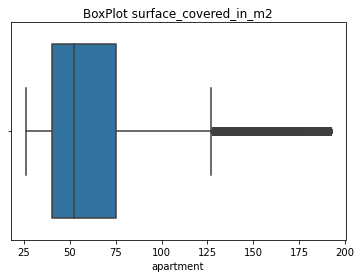

In [138]:
sns.boxplot(data.loc[data.property_type == "apartment", "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("apartment")

C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'house')

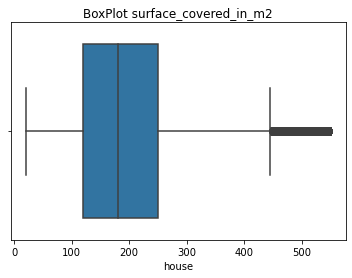

In [139]:
sns.boxplot(data.loc[data.property_type == "house", "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("house")

C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'PH')

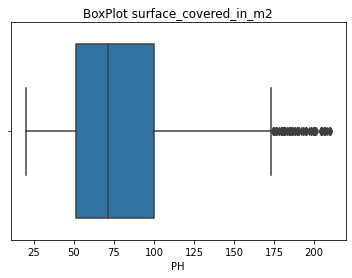

In [140]:
sns.boxplot(data.loc[data.property_type == "PH", "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("PH")

C:\Users\dh\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'store')

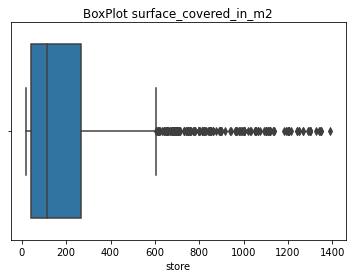

In [141]:
sns.boxplot(data.loc[data.property_type == "store", "surface_covered_in_m2"])
plt.title("BoxPlot surface_covered_in_m2")
plt.xlabel("store")

## 7.4: ANALISIS PATRONES REGEX: categorizacion de las busquedas

Clasificacion de los patrones encontrados:

* complejo: lo vamos a tomar como "complejo"
* barrio = "barrio exclusivo"
* en_sobre = "estrategico"
* sobre_calle: place_with_parent_names
* en_calle_entre_calle_y_Calle: definimos como: estrategico
* boulevar: boulevar_1: estrategico, bouelevar_2: descartado
* avenida: "avenida"


In [142]:
recuperados

[['complejo_1', 'complejo_2'],
 ['barrio_1', 'barrio_2', 'barrio_3'],
 ['en_sobre_1', 'en_sobre_2', 'en_sobre_3'],
 ['sobre_calle_1', 'sobre_calle_2', 'sobre_calle_3'],
 ['en_calle', 'entre'],
 ['en_bv', 'en_boulevar'],
 ['en_av', 'en_avenida']]

In [143]:
lista_categorias = [
    "complejo",
    "barrio exclusivo",
    "estrategico",
    None,
    "estrategico",
    None,
    "avenida importante",
]
lista_indices = []

for i, patron in enumerate(recuperados):
    # print1
    #    display(data_ubic_mascara1.loc[:,patron])

    mask_data = data_geo.loc[:, patron].any(axis=1)
    # print 2
    #    display(data_ubic_mascara1.loc[mask_data, patron])
    if i < 2:
        print("soy el patron n:  {}".format(i + 1))  # 1
        print("...acabo de sacar las filas innecesarias")  # 2
        print(
            "...estoy guardando el indice del patron {} en el elemento {} de la lista_indices\n".format(
                patron, i
            )
        )
    else:
        if i == len(recuperados) - 1:
            print("...")
    indice_mask = data_geo.loc[mask_data, patron].index
    lista_indices.append(indice_mask)


columnas = []
data_check = data_geo.loc[data_geo.loc[:, recuperados[3]].any(axis=1), recuperados[3]]
data_check.columns = ["1", "2", "3"]
data_check["1"].fillna(data_check["2"], inplace=True)
data_check["1"].fillna(data_check["3"], inplace=True)


for i in range(len(lista_categorias)):
    if i == 3:
        name = "direccion"
        data.loc[data.index.intersection(lista_indices[i]), name] = data_check["1"]

    else:
        name = "regex" + str(i + 1)
        data.loc[data.index.intersection(lista_indices[i]), name] = lista_categorias[i]
        data.loc[data.index.intersection(lista_indices[i]), name] = lista_categorias[i]
    columnas.append(name)


# modulo interactivo de impresion
print("Fin de la incorporacion de patrones")

soy el patron n:  1
...acabo de sacar las filas innecesarias
...estoy guardando el indice del patron ['complejo_1', 'complejo_2'] en el elemento 0 de la lista_indices

soy el patron n:  2
...acabo de sacar las filas innecesarias
...estoy guardando el indice del patron ['barrio_1', 'barrio_2', 'barrio_3'] en el elemento 1 de la lista_indices

...
Fin de la incorporacion de patrones


In [144]:
# orden de jerarquia de los regex:
# 1. complejo
# 2. avenida
# 3. barrio exclusivo
# 4. estrategico

data["regex1"].fillna(data["regex7"], inplace=True)
data["regex1"].fillna(data["regex2"], inplace=True)
data["regex1"].fillna(data["regex3"], inplace=True)
data["regex1"].fillna(data["regex5"], inplace=True)
data["regex1"].fillna(googlemaps, inplace=True)
data.drop(["regex7", "regex2", "regex3", "regex5", "regex6"], axis=1, inplace=True)

In [145]:
porcentaje_nuloss(data)

>> PORCENTAJE DE DATOS NULOS:



direccion                     97.87
floor                         93.44
expenses                      88.43
regex1                        84.66
rooms                         61.14
lat-lon                       42.67
lat                           42.67
lon                           42.67
surface_total_in_m2           33.28
price_per_m2                  28.03
price_usd_per_m2              23.92
currency                      17.11
price                         17.10
price_aprox_local_currency    17.10
price_aprox_usd               17.10
geonames_id                   15.42
surface_covered_in_m2         12.66
image_thumbnail                2.61
place_name                     0.02
description                    0.00
properati_url                  0.00
title                          0.00
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
property_type                  0.00
operation                      0.00
Unnamed: 0                  

In [146]:
data.currency.value_counts()

USD    95831
Name: currency, dtype: int64

## 7.5 RECUPERO GEONAMES_ID

In [147]:
print("Cantidad de valores no nulos en data de recuperacion: True for elemento")
display(data_geo_id["geonames_id"].notna().value_counts())
print("\nCantidad de valores no nulos en data de trabajo: idem")
display(data["geonames_id"].notna().value_counts())

Cantidad de valores no nulos en data de recuperacion: True for elemento


True     105027
False     16193
Name: geonames_id, dtype: int64


Cantidad de valores no nulos en data de trabajo: idem


True     97781
False    17825
Name: geonames_id, dtype: int64

In [148]:
print(
    f"Tenemos 105027 elementos en data recupero, y 97853 en data trabajo, veremos cuanto recuperamos"
)

display(data["geonames_id"].fillna(data_geo_id["geonames_id"]).notna().value_counts())

print(f"Recuperamos {100180-97853}")

data["geonames_id"].fillna(data_geo_id["geonames_id"], inplace=True)

Tenemos 105027 elementos en data recupero, y 97853 en data trabajo, veremos cuanto recuperamos


True     100102
False     15504
Name: geonames_id, dtype: int64

Recuperamos 2327


In [149]:
data.currency.value_counts()

USD    95831
Name: currency, dtype: int64

## 7.6 reacondicionamiento general del dataset:


In [150]:
nuloss(data)

>> DATOS NULOS:



direccion                     113139
floor                         108028
expenses                      102228
regex1                         97872
rooms                          70687
lat-lon                        49324
lat                            49324
lon                            49324
surface_total_in_m2            38469
price_per_m2                   32409
price_usd_per_m2               27656
currency                       19775
price                          19774
price_aprox_local_currency     19774
price_aprox_usd                19774
geonames_id                    15504
surface_covered_in_m2          14639
image_thumbnail                 3015
place_name                        23
description                        2
properati_url                      0
title                              0
state_name                         0
country_name                       0
place_with_parent_names            0
property_type                      0
operation                          0
U

In [151]:
columnas = [
    "image_thumbnail",
    "description",
    "title",
    "place_with_parent_names",
    "operation",
    "Unnamed: 0",
    "country_name",
    "properati_url",
    "state_name",
    "lat-lon",
    "state_name",
]
data.drop(columnas, axis=1)
nuloss(data)
print("count(raw's) =", data.shape[0])

>> DATOS NULOS:



direccion                     113139
floor                         108028
expenses                      102228
regex1                         97872
rooms                          70687
lat-lon                        49324
lat                            49324
lon                            49324
surface_total_in_m2            38469
price_per_m2                   32409
price_usd_per_m2               27656
currency                       19775
price                          19774
price_aprox_local_currency     19774
price_aprox_usd                19774
geonames_id                    15504
surface_covered_in_m2          14639
image_thumbnail                 3015
place_name                        23
description                        2
properati_url                      0
title                              0
state_name                         0
country_name                       0
place_with_parent_names            0
property_type                      0
operation                          0
U

count(raw's) = 115606


accion a tomar:

- intentar juntar las columnas de caracteristicas aunque se pierdan valores? (maybe)
- revisar esos 23 place_name (ok)
- achicar el rango store outlier de la cola extrema, de la cabeza digamos
- hay un outlier en lat (ok)

In [152]:
print("Recupero de los valores place_name isna()")
display(data.loc[data.place_name.isna(), "place_with_parent_names"])
data.loc[data.place_name.isna(), "place_name"] = "Tigre"

Recupero de los valores place_name isna()


6489     |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14839    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
18622    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
21922    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
23664    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
24722    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
38856    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
45970    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
46642    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
53130    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
55306    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57703    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57759    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57764    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57793    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
58004    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
58037    |Argentina|Bs.As. G.B.A. Zona Norte|T

In [153]:
print("Tirando valores atipicos de lat-lon")

indice = data.lat.idxmax()
# data.loc[indice]
data.drop(indice, inplace=True)

Tirando valores atipicos de lat-lon


In [154]:
porcentaje_nuloss(data)
print()
nuloss(data)
print()
print("count(raw's) =", data.shape[0])

>> PORCENTAJE DE DATOS NULOS:



direccion                     97.87
floor                         93.45
expenses                      88.43
regex1                        84.66
rooms                         61.15
lat-lon                       42.67
lat                           42.67
lon                           42.67
surface_total_in_m2           33.28
price_per_m2                  28.03
price_usd_per_m2              23.92
price                         17.10
currency                      17.10
price_aprox_local_currency    17.10
price_aprox_usd               17.10
geonames_id                   13.41
surface_covered_in_m2         12.66
image_thumbnail                2.61
description                    0.00
properati_url                  0.00
title                          0.00
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
place_name                     0.00
property_type                  0.00
operation                      0.00
Unnamed: 0                  


>> DATOS NULOS:



direccion                     113138
floor                         108028
expenses                      102227
regex1                         97871
rooms                          70687
lat-lon                        49324
lat                            49324
lon                            49324
surface_total_in_m2            38468
price_per_m2                   32408
price_usd_per_m2               27655
price                          19774
currency                       19774
price_aprox_local_currency     19774
price_aprox_usd                19774
geonames_id                    15504
surface_covered_in_m2          14638
image_thumbnail                 3015
description                        2
properati_url                      0
title                              0
state_name                         0
country_name                       0
place_with_parent_names            0
place_name                         0
property_type                      0
operation                          0
U


count(raw's) = 115605


In [155]:
columnas = [
    "image_thumbnail",
    "description",
    "title",
    "place_with_parent_names",
    "operation",
    "Unnamed: 0",
    "country_name",
    "properati_url",
    "state_name",
    "lat-lon",
    "state_name",
]
data.drop(columnas, axis=1, inplace=True)

In [156]:
# LIMPIEZA SEGUN CANTIDAD DE COLUMNAS NULAS POR ENTRADA
rows_null_values = data.isna().sum(axis=1)
print(
    "Cantidad de columnas nulas por entradas:\n{}".format(
        rows_null_values.value_counts(sort=False)
    )
)

mask_rows_null_values = rows_null_values < 14
print(
    "\nCantidad de entradas que tienen 14 o más de 14 variables nulas: {}".format(
        data.shape[0] - mask_rows_null_values.sum()
    )
)
print(
    "Porcentaje de entradas con exceso de variables nulas {}%".format(
        round((data.shape[0] - mask_rows_null_values.sum()) / data.shape[0] * 100, 2)
    )
)
print("Dimension del nuevo dataframe: {}".format(data[mask_rows_null_values].shape[0]))

Cantidad de columnas nulas por entradas:
0         4
1        55
2       894
3      4262
4     21255
5     20371
6     14203
7     17760
8     10551
9      3434
10     4437
11     5670
12     3939
13     5566
14     2438
15      742
16       24
dtype: int64

Cantidad de entradas que tienen 14 o más de 14 variables nulas: 3204
Porcentaje de entradas con exceso de variables nulas 2.77%
Dimension del nuevo dataframe: 112401


In [157]:
porcentaje_nuloss(data)
porcentaje_nuloss(data[mask_rows_null_values])

>> PORCENTAJE DE DATOS NULOS:



direccion                     97.87
floor                         93.45
expenses                      88.43
regex1                        84.66
rooms                         61.15
lat                           42.67
lon                           42.67
surface_total_in_m2           33.28
price_per_m2                  28.03
price_usd_per_m2              23.92
price                         17.10
price_aprox_usd               17.10
currency                      17.10
price_aprox_local_currency    17.10
geonames_id                   13.41
surface_covered_in_m2         12.66
place_name                     0.00
property_type                  0.00
dtype: float64

>> PORCENTAJE DE DATOS NULOS:



direccion                     97.82
floor                         93.26
expenses                      88.13
regex1                        84.35
rooms                         60.21
lat                           41.09
lon                           41.09
surface_total_in_m2           32.21
price_per_m2                  25.98
price_usd_per_m2              21.75
price                         14.74
price_aprox_usd               14.74
currency                      14.74
price_aprox_local_currency    14.74
geonames_id                   13.53
surface_covered_in_m2         11.28
place_name                     0.00
property_type                  0.00
dtype: float64

In [158]:
data = data[mask_rows_null_values]

## FIN DE LA NOTEBOOK

In [159]:
nuloss(data)

>> DATOS NULOS:



direccion                     109951
floor                         104826
expenses                       99056
regex1                         94815
rooms                          67680
lat                            46184
lon                            46184
surface_total_in_m2            36202
price_per_m2                   29204
price_usd_per_m2               24451
price                          16570
price_aprox_usd                16570
currency                       16570
price_aprox_local_currency     16570
geonames_id                    15205
surface_covered_in_m2          12684
place_name                         0
property_type                      0
dtype: int64

In [160]:
data

,property_type,place_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,regex1,direccion
0,PH,Mataderos,3430787.0,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,None,NaN
1,apartment,La Plata,3432039.0,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,apartment,Mataderos,3430787.0,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,None,NaN
3,PH,Liniers,3431333.0,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,apartment,Centro,3435548.0,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,apartment,Belgrano,3436077.0,NaN,NaN,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,None,NaN
121216,house,Beccar,3436080.0,NaN,NaN,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,NaN,NaN,NaN,None,NaN
121217,apartment,Villa Urquiza,3433775.0,-34.570639,-58.475596,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,NaN,NaN,NaN,None,NaN
121218,apartment,Plaza Colón,NaN,NaN,NaN,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,NaN,NaN,NaN,None,NaN


In [161]:
"""DATASET: WORKSHOP1 / GRUPO 4 / DIGITAL HOUSE / 10/02/2022"""
# ···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
las columnas que reflejan caracteristicas del precio (en orden jerarquico):
    - (price , currency) : aunque currency no aporta valor ya que todos los precios estan expresados en USD
    - price_usd_per_m2
    - price_aprox_usd
    - price_per_m2
    - price_aprox_local_currency
"""
# ···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
las columnas que reflejan caracteristicas del superficie (en orden jerarquico):
    - surface_covered_in_m2
    - surface_total_in_m2
"""
# ···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
las columnas que reflejan caracteristicas de ubicacion (en orden jerarquico):
    - (lat-lon, lat, lon): una terna que deberia representar lo mismo
    - geonames_id
    - place_name
    - state_name
"""
# ···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#
"""
Las columnas que reflejan caracteristicas de la propiedad (en orden jerarquico):
    - direccion
    - regex1
    - rooms
    - expenses
    - floor
    - googleamps
"""
# ···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#···#

'\nLas columnas que reflejan caracteristicas de la propiedad (en orden jerarquico):\n    - direccion\n    - regex1\n    - rooms\n    - expenses\n    - floor\n    - googleamps\n'